In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6,4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [2]:
car_df = pd.read_csv('./adverts.csv')

In [3]:
car_df.head()

public_reference   mileage reg_code standard_colour standard_make  \
0   202006039777689       0.0      NaN            Grey         Volvo   
1   202007020778260  108230.0       61            Blue        Jaguar   
2   202007020778474    7800.0       17            Grey         SKODA   
3   202007080986776   45000.0       16           Brown      Vauxhall   
4   202007161321269   64000.0       64            Grey    Land Rover   

      standard_model vehicle_condition  year_of_registration  price  \
0               XC90               NEW                   NaN  73970   
1                 XF              USED                2011.0   7000   
2               Yeti              USED                2017.0  14000   
3              Mokka              USED                2016.0   7995   
4  Range Rover Sport              USED                2015.0  26995   

   body_type  crossover_car_and_van              fuel_type  
0        SUV                  False  Petrol Plug-in Hybrid  
1     Saloon                  False                 Diesel  
2        SUV                  False                 Petrol  
3  Hatchback                  False                 Diesel  
4        SUV                  False                 Diesel

In [4]:
car_df.shape
#The dataset includes 402005 rows

(402005, 12)

In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [6]:
car_df.describe().round(2)

public_reference    mileage  year_of_registration       price
count      4.020050e+05  401878.00             368694.00   402005.00
mean       2.020071e+14   37743.60               2015.01    17341.97
std        1.691662e+10   34831.72                  7.96    46437.46
min        2.013072e+14       0.00                999.00      120.00
25%        2.020090e+14   10481.00               2013.00     7495.00
50%        2.020093e+14   28629.50               2016.00    12600.00
75%        2.020102e+14   56875.75               2018.00    20000.00
max        2.020110e+14  999999.00               2020.00  9999999.00

In [7]:
car_df['vehicle_condition'].value_counts()

USED    370756
NEW      31249
Name: vehicle_condition, dtype: int64

In [8]:
car_df['body_type'].value_counts()

Hatchback          167315
SUV                115872
Saloon              36641
Estate              24692
Coupe               23258
Convertible         16038
MPV                 16026
Pickup                620
Combi Van             214
Limousine             159
Minibus               149
Camper                 77
Panel Van              61
Window Van             41
Chassis Cab             3
Car Derived Van         2
Name: body_type, dtype: int64

In [9]:
car_df.loc[car_df['fuel_type'] =='Petrol']

public_reference   mileage reg_code standard_colour standard_make  \
2        202007020778474    7800.0       17            Grey         SKODA   
5        202009304412074   16000.0       17            Blue          Audi   
6        202007080998445   24075.0       17             Red      Vauxhall   
11       202007161303602   24487.0       17           Black       Peugeot   
12       202009173867934    4765.0       69           White         SKODA   
...                  ...       ...      ...             ...           ...   
401999   202010315651841   74732.0       59            Blue        Toyota   
402000   202010315652942    5179.0       69            Grey       Peugeot   
402001   202010315657341  110000.0       59             Red       Peugeot   
402002   202010315659271   52760.0       62           White        Nissan   
402003   202011015662436   10250.0       65             Red        Abarth   

       standard_model vehicle_condition  year_of_registration  price  \
2                Yeti              USED                2017.0  14000   
5                  S5              USED                2017.0  29000   
6                Viva              USED                2017.0   5861   
11                208              USED                2017.0   8795   
12            Octavia              USED                2019.0  16990   
...               ...               ...                   ...    ...   
401999          Auris              USED                2009.0   2600   
402000            208              USED                2019.0  10595   
402001            107              USED                2009.0   2000   
402002        Qashqai              USED                2012.0   7250   
402003            595              USED                2015.0  11490   

          body_type  crossover_car_and_van fuel_type  
2               SUV                  False    Petrol  
5       Convertible                  False    Petrol  
6         Hatchback                  False    Petrol  
11        Hatchback                  False    Petrol  
12           Estate                  False    Petrol  
...             ...                    ...       ...  
401999    Hatchback                  False    Petrol  
402000    Hatchback                  False    Petrol  
402001    Hatchback                  False    Petrol  
402002          SUV                  False    Petrol  
402003    Hatchback                  False    Petrol  

[216929 rows x 12 columns]

#ANALYSIS OF DISTRIBUTION

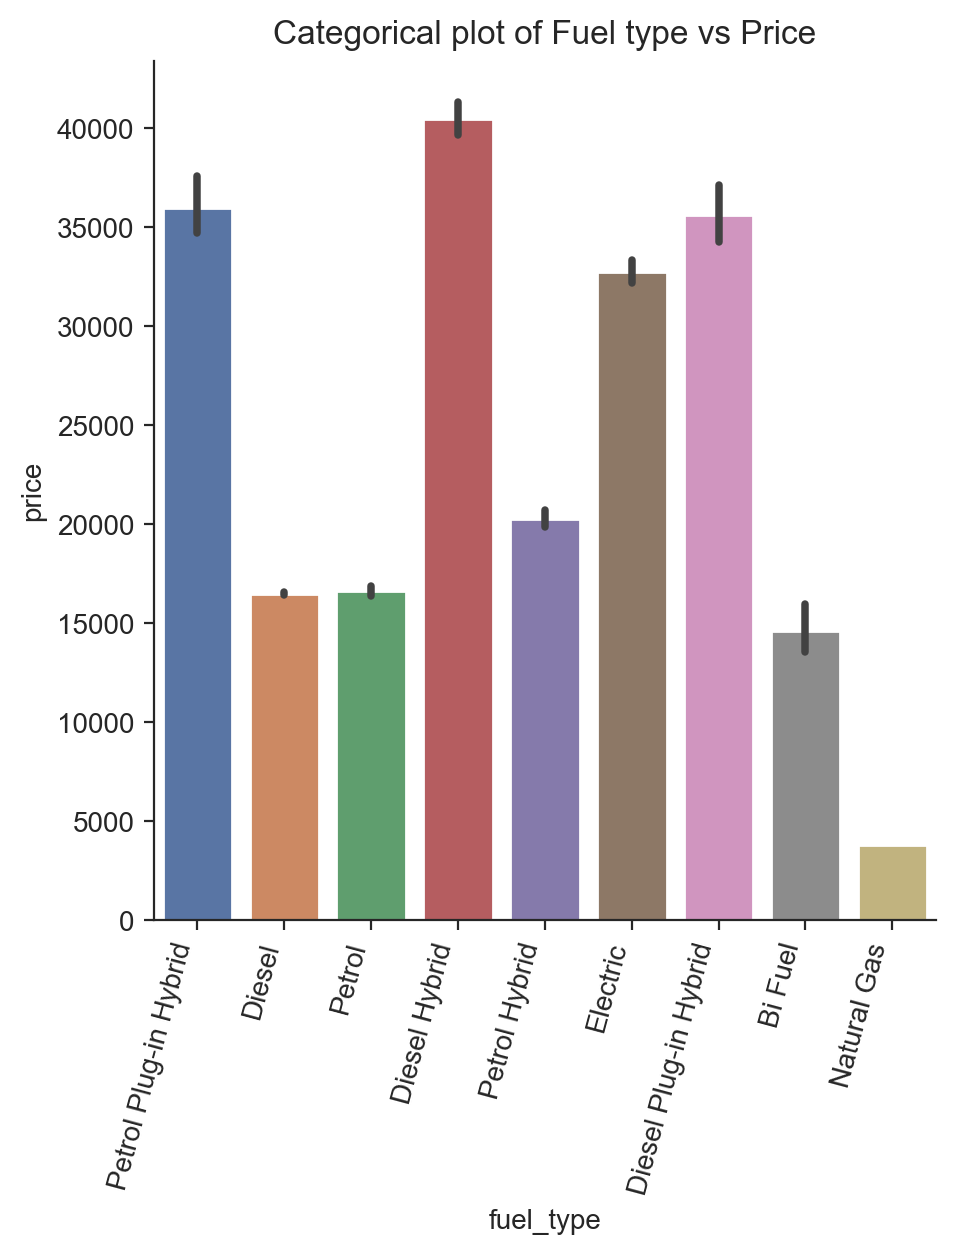

In [10]:

# plt.subplots(figsize=(8, 4))

ax = sns.catplot(data=car_df, x='fuel_type', y='price', kind='bar')
ax.set_xticklabels(rotation=75, ha="right")
plt.title("Categorical plot of Fuel type vs Price")

plt.show()

#Diesel hybrid as fuel type cost much,in general, all hybrid cars are expensive probaby due to their efficiency 
#while natural gas is cheap


In [11]:
car_df['mileage'].describe().round(2)

count    401878.00
mean      37743.60
std       34831.72
min           0.00
25%       10481.00
50%       28629.50
75%       56875.75
max      999999.00
Name: mileage, dtype: float64

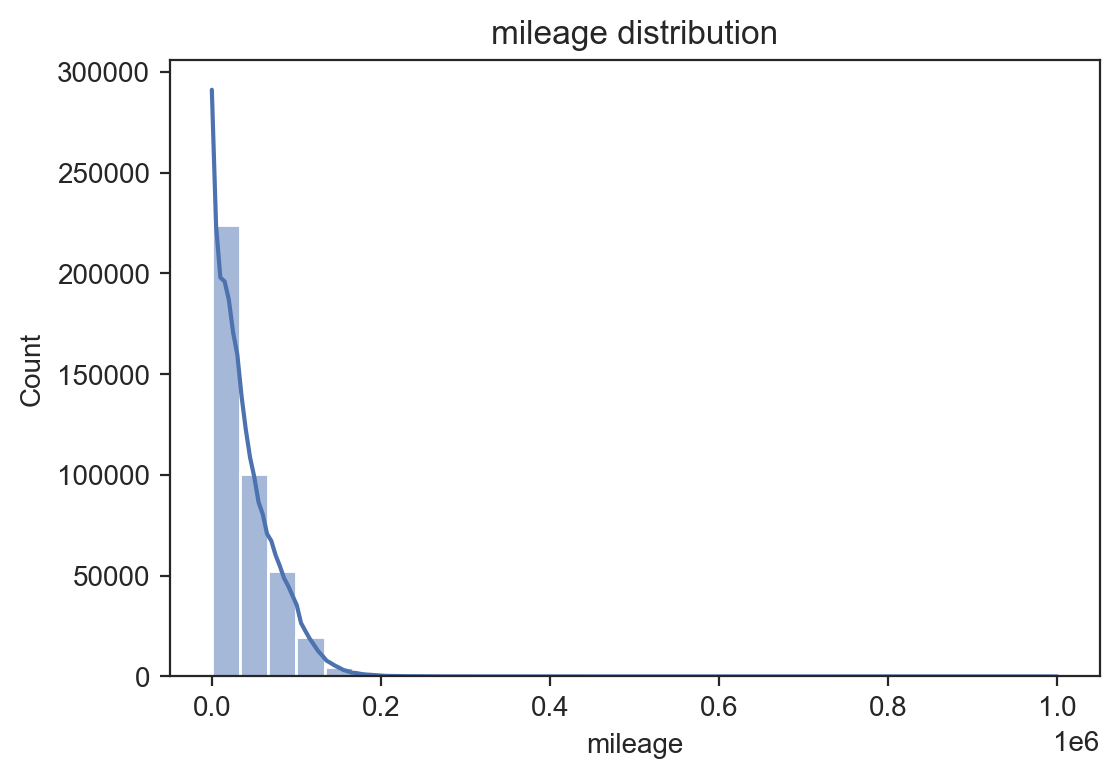

In [12]:
sns.histplot(data=car_df, x='mileage', kde='True', bins=30)
plt.title('mileage distribution')
# plt.xlim(0, 300000)
plt.show()

#There are some extreme values which can be an outliers, this skewed the distribution
#seems values greater than 200000, are to be neglected

In [13]:
car_df['year_of_registration'].describe().round(2)

count    368694.00
mean       2015.01
std           7.96
min         999.00
25%        2013.00
50%        2016.00
75%        2018.00
max        2020.00
Name: year_of_registration, dtype: float64

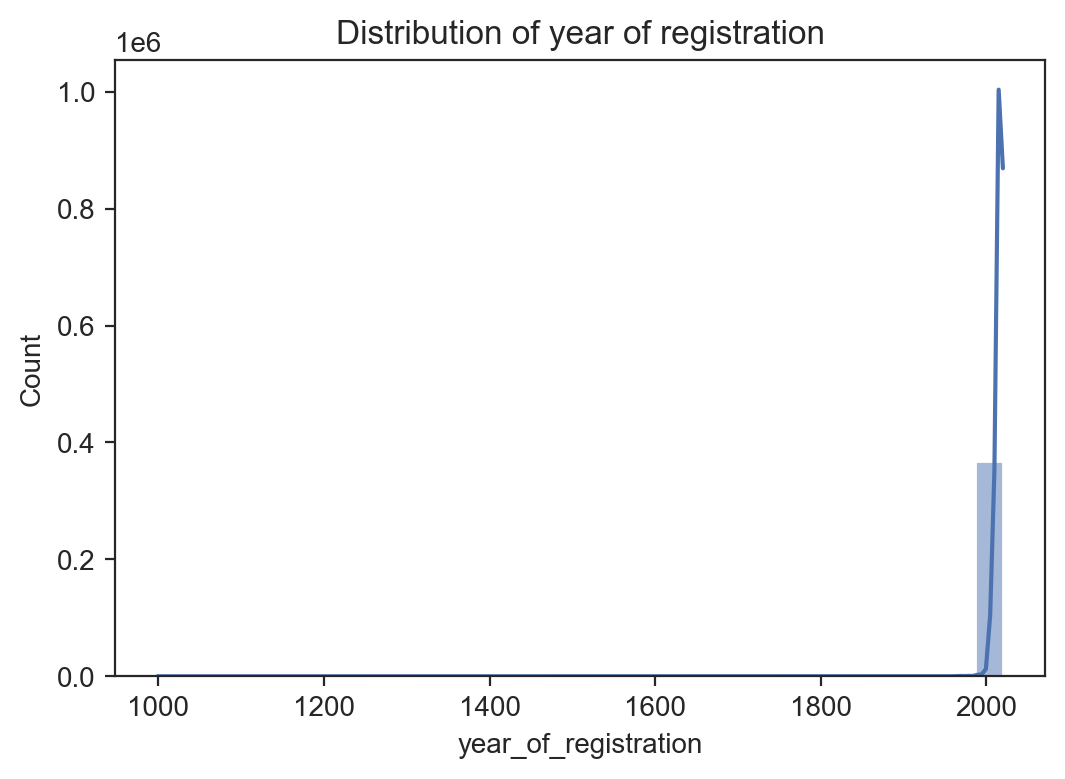

In [14]:
sns.histplot(data=car_df, x='year_of_registration', kde='True', bins=30)
plt.title('Distribution of year of registration')
# plt.xlim(1985, 2020)
plt.show()

# There are outliers in the year of registration column, the year range is around 1985 to 2020

In [15]:
car_df['price'].describe().round(2)

count     402005.00
mean       17341.97
std        46437.46
min          120.00
25%         7495.00
50%        12600.00
75%        20000.00
max      9999999.00
Name: price, dtype: float64

In [16]:
# ax = sns.histplot(np.log10(car_df.loc[ car_df['price']>0, 'price' ]))
# ax.set_xticks(range(2,6))
# ax.set_xticklabels(np.power(2, range(2,6)));

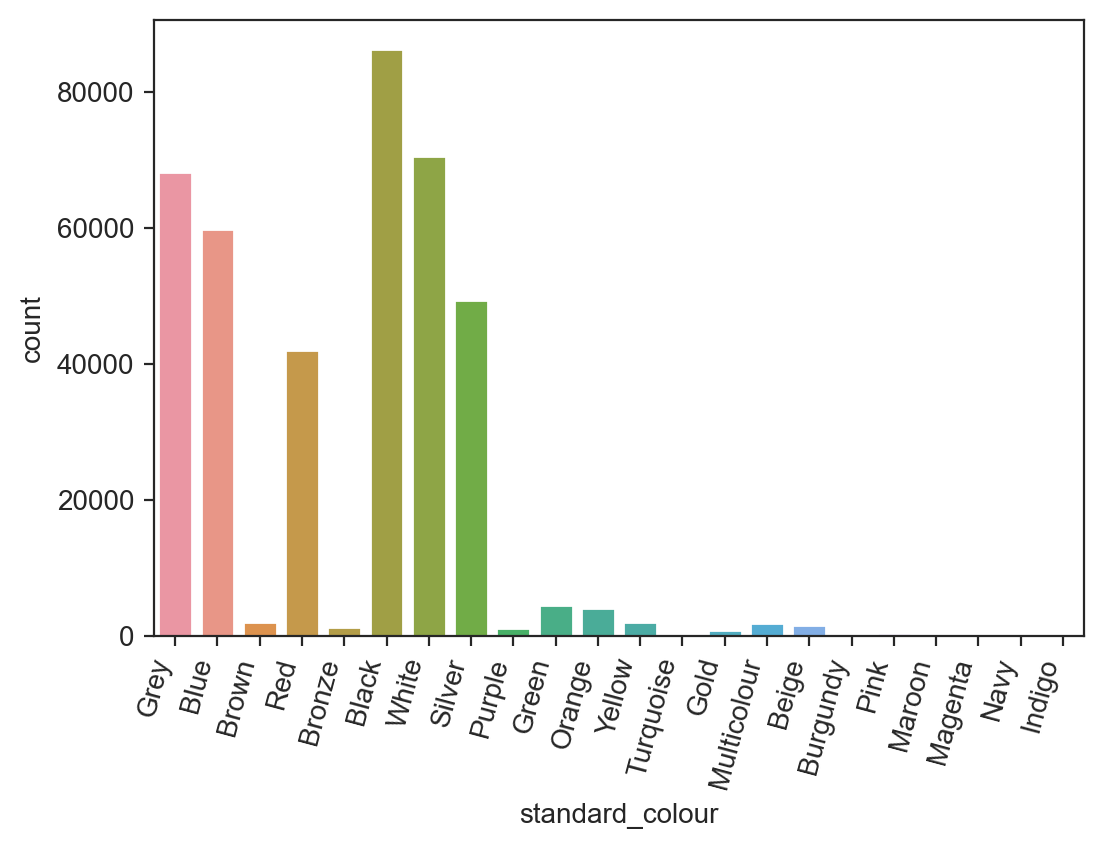

In [17]:
ax = sns.countplot(data=car_df, x='standard_colour')
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha="right")
plt.show()

#more people buy the black cars more compare follow by grey and silver cars

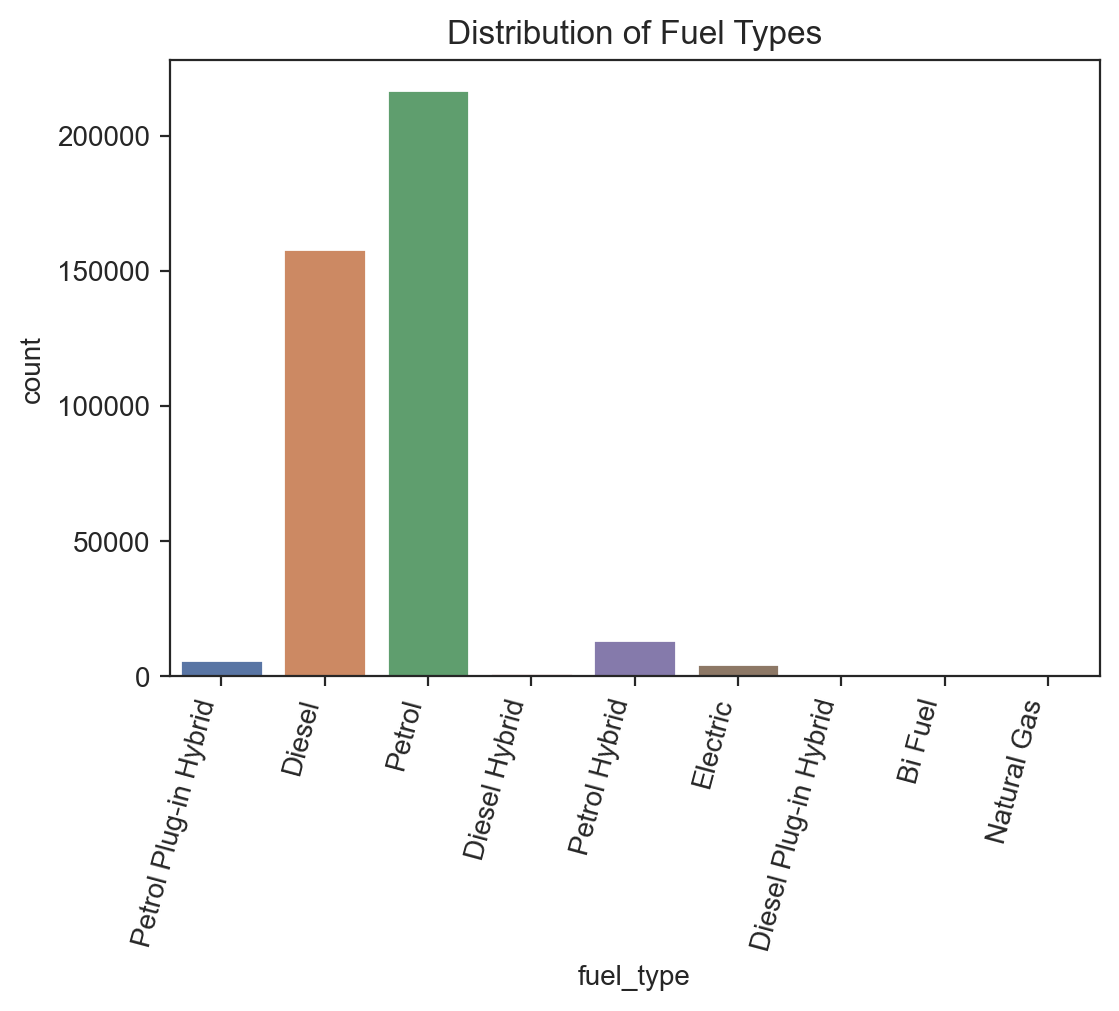

In [18]:
ax = sns.countplot(data=car_df, x='fuel_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha="right")
plt.title('Distribution of Fuel Types')
plt.show()

#More cars using petrol as their source of fuel are bought more compare to other fuel type cars

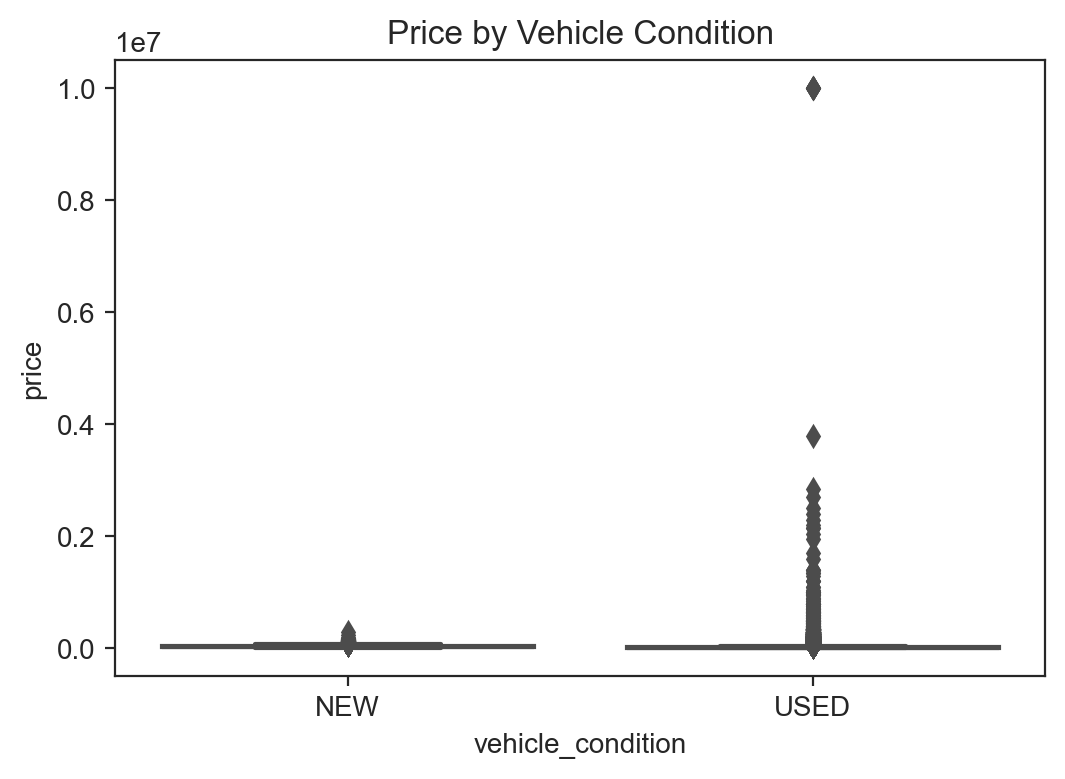

In [19]:
sns.boxplot(data=car_df, x='vehicle_condition', y='price')
# ax.set_xticklabels(rotation=75, ha="right")
plt.title("Price by Vehicle Condition")

plt.show()

#There are too many outliers and this datasets requires that it is cleaned

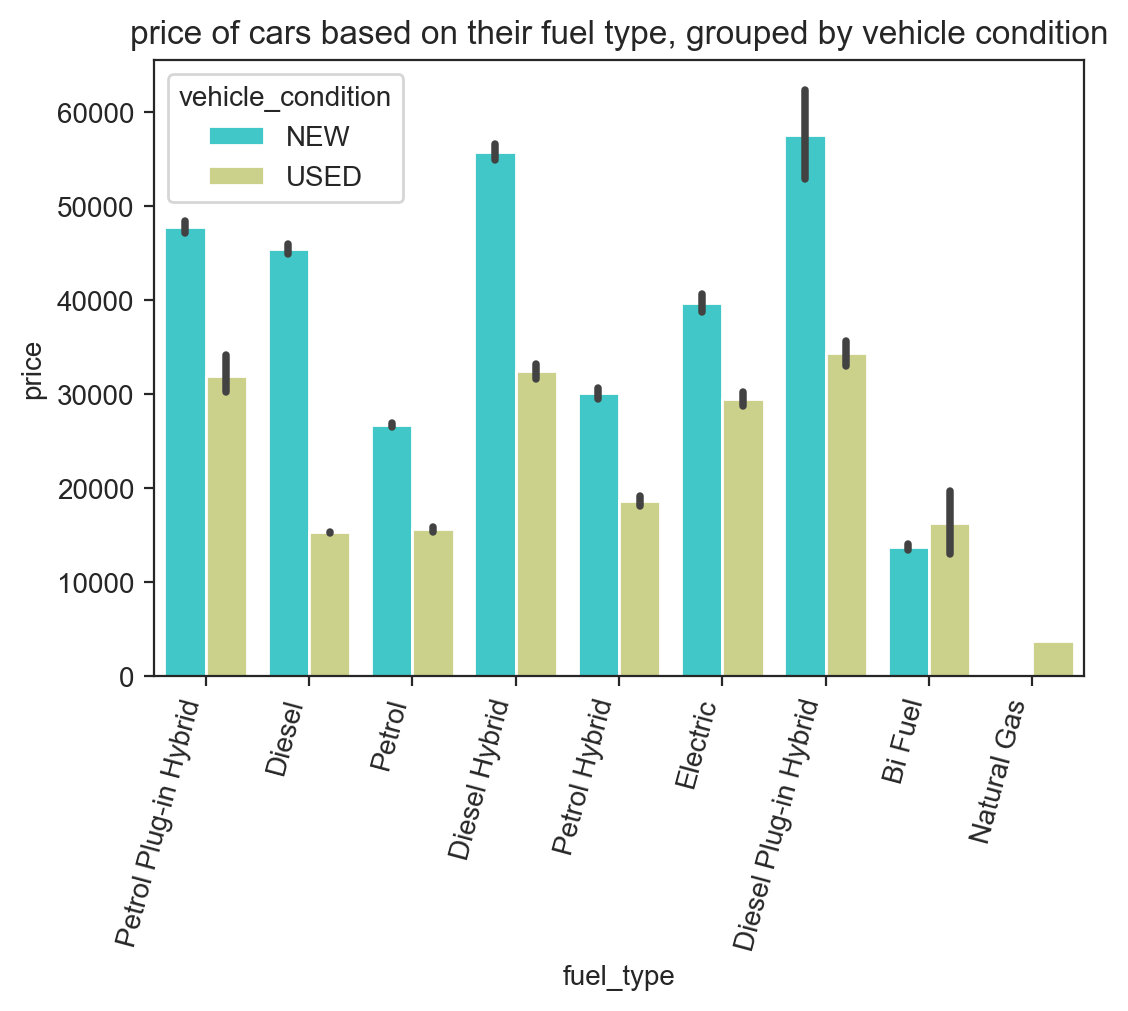

In [20]:
ax = sns.barplot(data=car_df, x='fuel_type', y='price', 
            palette='rainbow', hue='vehicle_condition')
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha="right")
plt.title('price of cars based on their fuel type, grouped by vehicle condition')
plt.show()

#From this plot, new hybrid vehicles are expensive. but the new disel plug-in hybrid
#is more expensive. Even their used price is more than the new price of petrol and disel vehicles
#the cheapest is the used natural gas vehicles


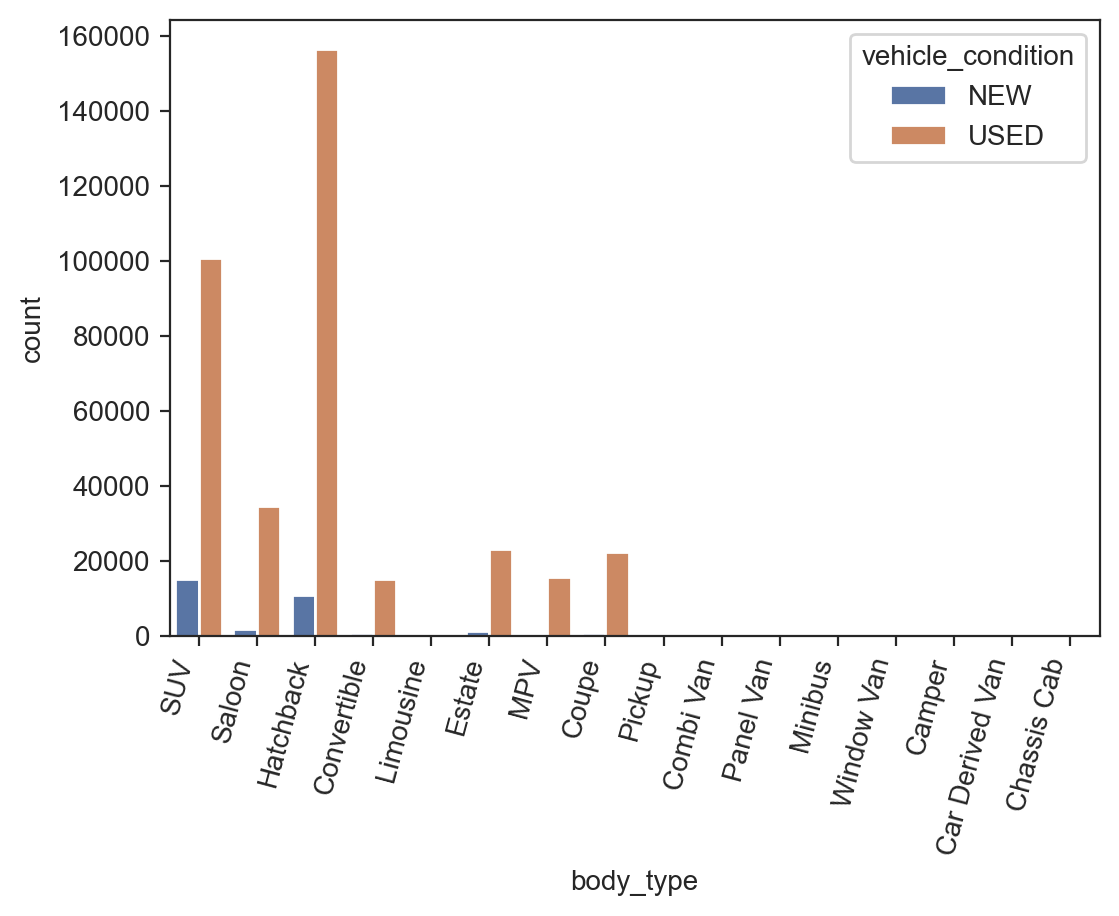

In [21]:
ax = sns.countplot(data=car_df, x='body_type', hue='vehicle_condition')
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha="right")
plt.show()

# more used cars were bought coomepare to the new ones, it can be seen that more new SUV were bought compare to hatchback

DATA PREPROCESING

In [22]:
car_df.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [23]:
variables = pd.DataFrame(columns=['Variable','Number of unique values','Number of nulls'])

for i, var in enumerate(car_df.columns):
    variables.loc[i] = [var, car_df[var].nunique(), car_df[var].isnull().sum()]

variables

# Reference: Rochelle's drop in class (2023)

Variable  Number of unique values  Number of nulls
0        public_reference                   402005                0
1                 mileage                    80634              127
2                reg_code                       72            31857
3         standard_colour                       22             5378
4           standard_make                      110                0
5          standard_model                     1168                0
6       vehicle_condition                        2                0
7    year_of_registration                       84            33311
8                   price                    30578                0
9               body_type                       16              837
10  crossover_car_and_van                        2                0
11              fuel_type                        9              601

In [24]:
#Data cleaning


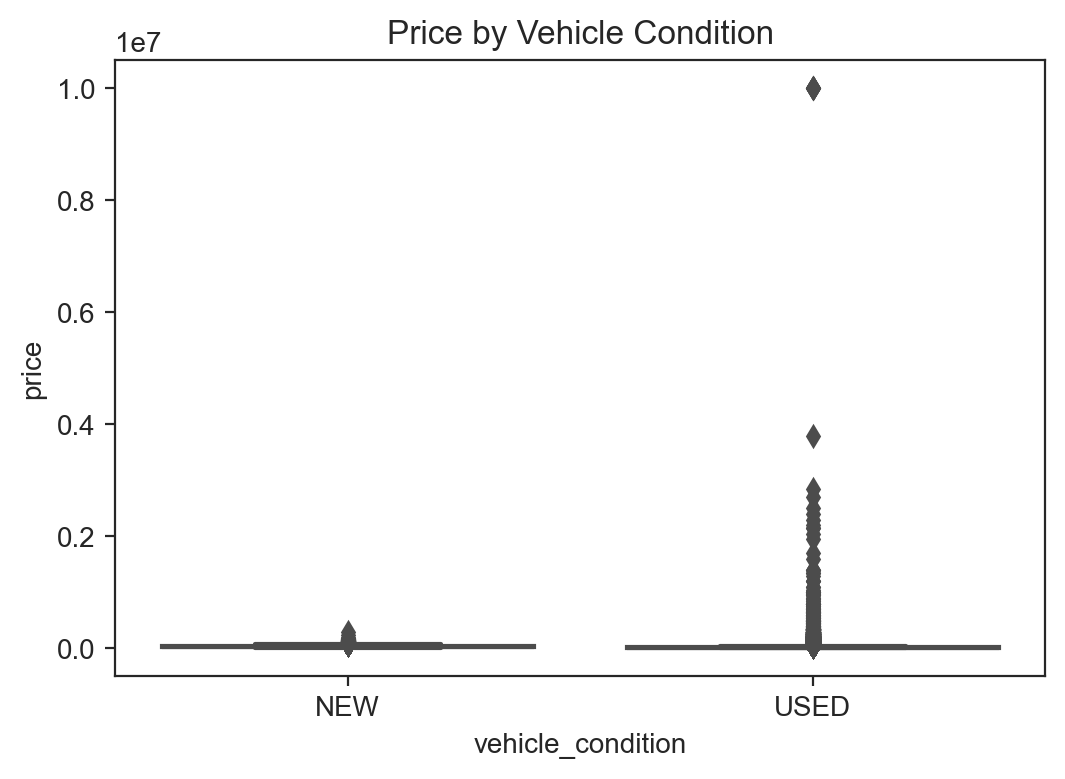

In [25]:
sns.boxplot(data=car_df, x='vehicle_condition', y='price')
# ax.set_xticklabels(rotation=75, ha="right")
plt.title("Price by Vehicle Condition")

plt.show()

#Some missing values rows which are outliers would have been removed

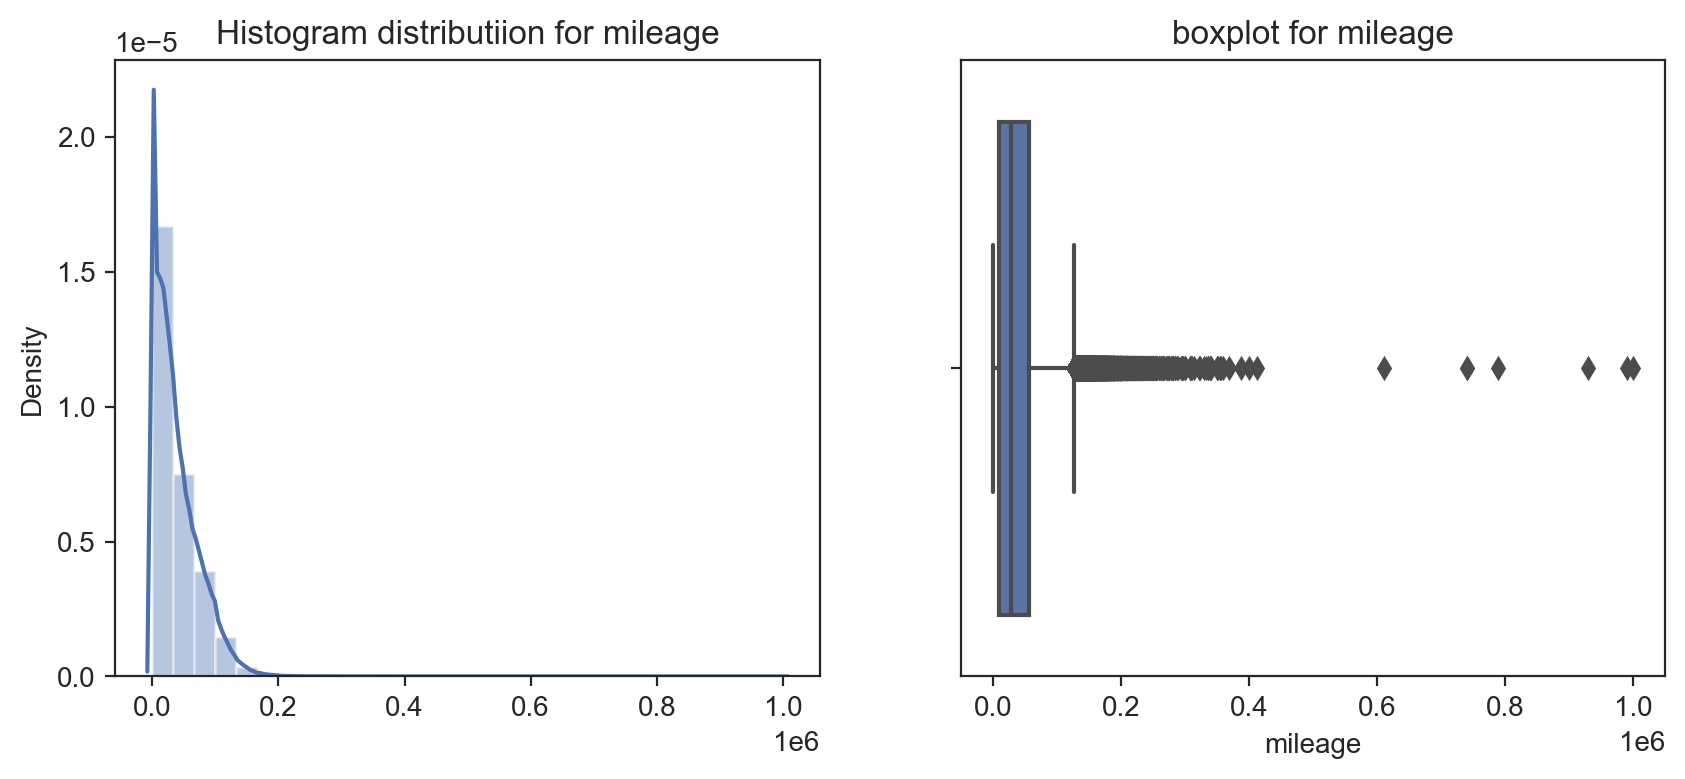

In [26]:
# Here i would like to remove the noise and outliers, most of the noise would be in the numerical features
# such as vehicle age, mileage, 
fig, ax = plt.subplots(1, 2, figsize=(10, 4));
sns.distplot(x=car_df['mileage'], bins=30, ax=ax[0])
ax[0].set_title("Histogram distributiion for mileage");
sns.boxplot(data=car_df, x='mileage', ax=ax[1])
ax[1].set_title("boxplot for mileage");

In [27]:
# car_df['mileage'].max()

car_df.query('mileage == 999999')

public_reference   mileage reg_code standard_colour standard_make  \
43974   202008122406434  999999.0       63           White      Vauxhall   

      standard_model vehicle_condition  year_of_registration  price  \
43974          Astra              USED                2013.0   9999   

       body_type  crossover_car_and_van fuel_type  
43974  Hatchback                  False    Diesel

In [28]:
#Ouliers in the mileage might also affect our analysis, having a mileage of 999999,
# might not be reasonable because, the car registration was 2013, and the max mileage 
# of vehicles is around 200000, so this might be an outlier

Q1 = car_df['mileage'].quantile(0.25)
Q3 = car_df['mileage'].quantile(0.75)
IQR = Q3 - Q1
car_df = car_df[(car_df['mileage'] >= Q1 - 1.5*IQR) & (car_df['mileage']<= Q3 + 1.5*IQR)]
print("lower_limit:" ,Q1 - 1.5 * IQR, "upper_limit: ", Q3 + 1.5 * IQR)

lower_limit: -59111.125 upper_limit:  126467.875


In [29]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393697 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       393697 non-null  int64  
 1   mileage                393697 non-null  float64
 2   reg_code               361886 non-null  object 
 3   standard_colour        388484 non-null  object 
 4   standard_make          393697 non-null  object 
 5   standard_model         393697 non-null  object 
 6   vehicle_condition      393697 non-null  object 
 7   year_of_registration   360426 non-null  float64
 8   price                  393697 non-null  int64  
 9   body_type              392887 non-null  object 
 10  crossover_car_and_van  393697 non-null  bool   
 11  fuel_type              393107 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 36.4+ MB


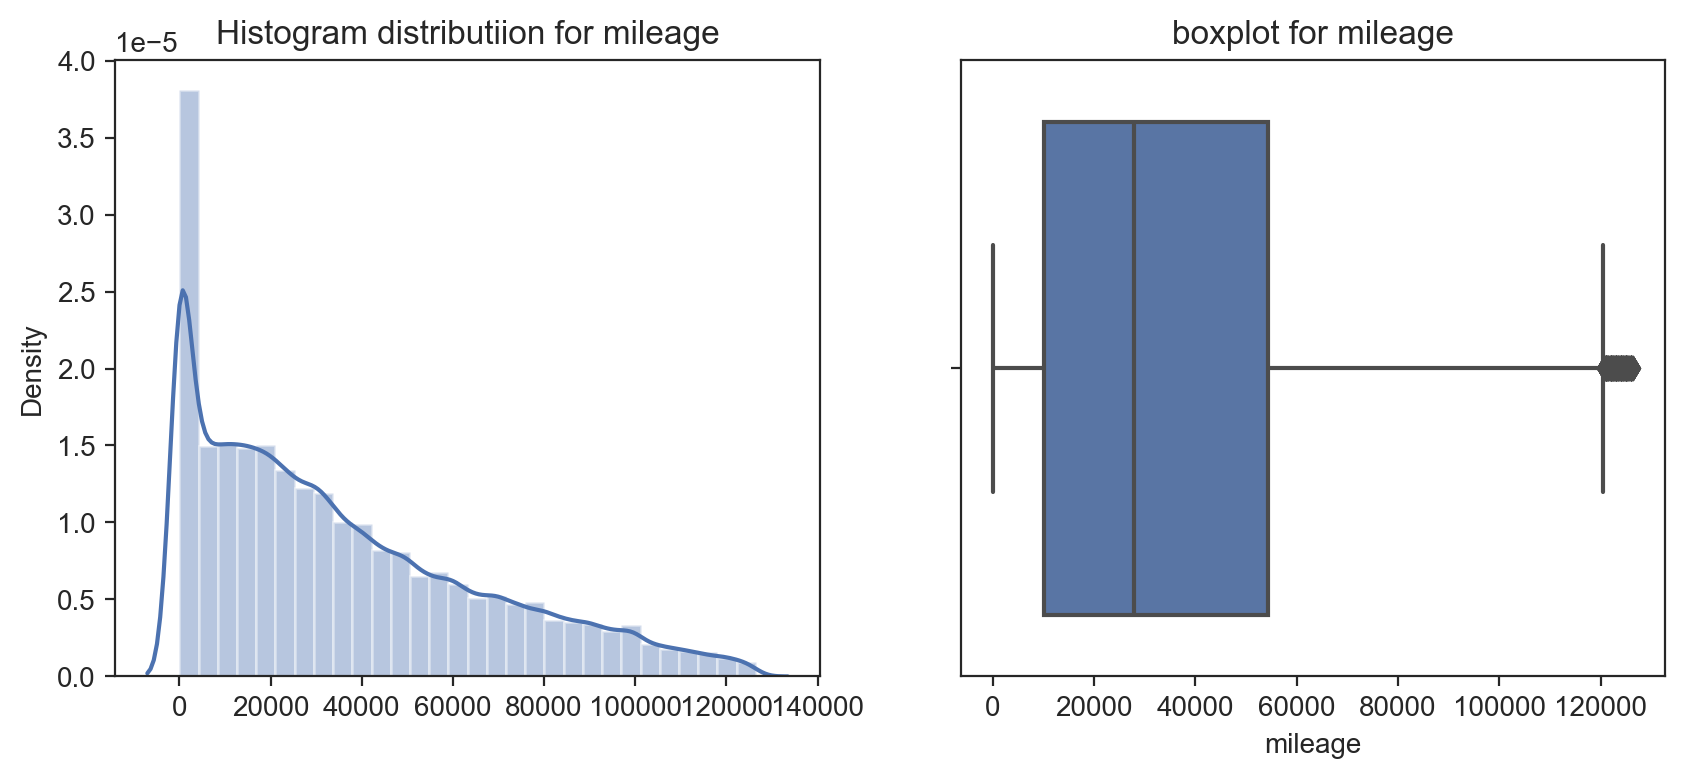

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4));
sns.distplot(x=car_df['mileage'], bins=30, ax=ax[0])
ax[0].set_title("Histogram distributiion for mileage");
sns.boxplot(data=car_df, x='mileage', ax=ax[1])
ax[1].set_title("boxplot for mileage");

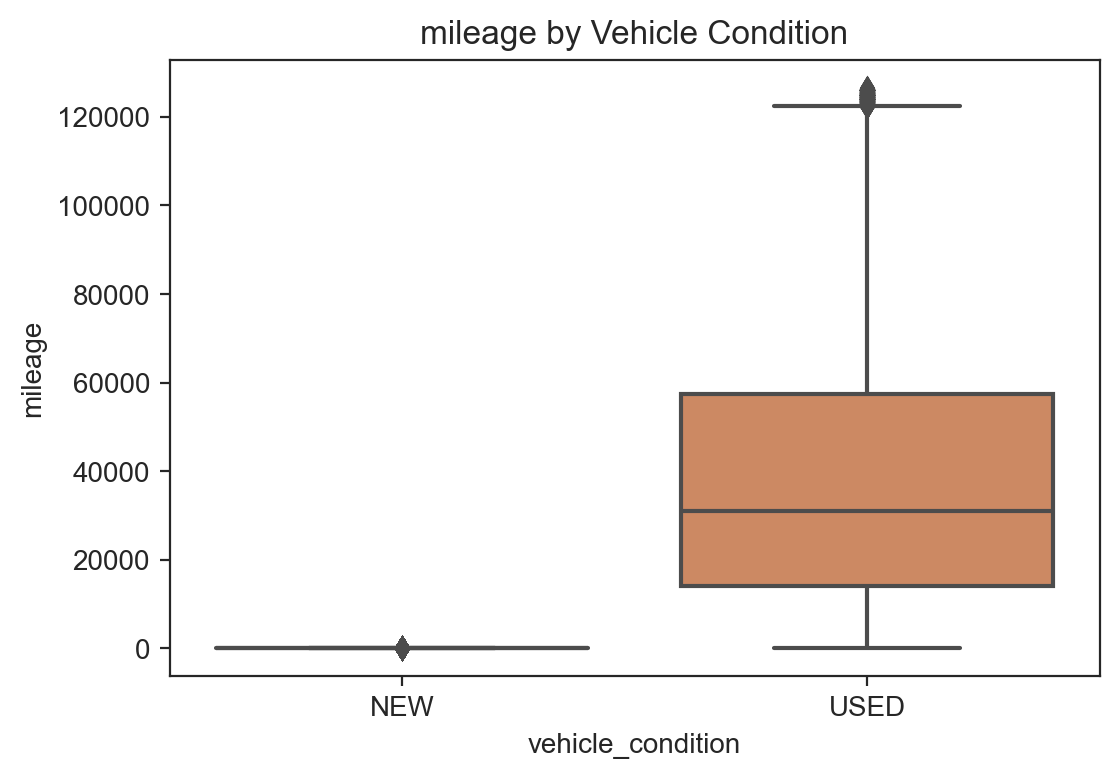

In [31]:
sns.boxplot(data=car_df, x='vehicle_condition', y='mileage')
# ax.set_xticklabels(rotation=75, ha="right")
plt.title("mileage by Vehicle Condition")

plt.show()

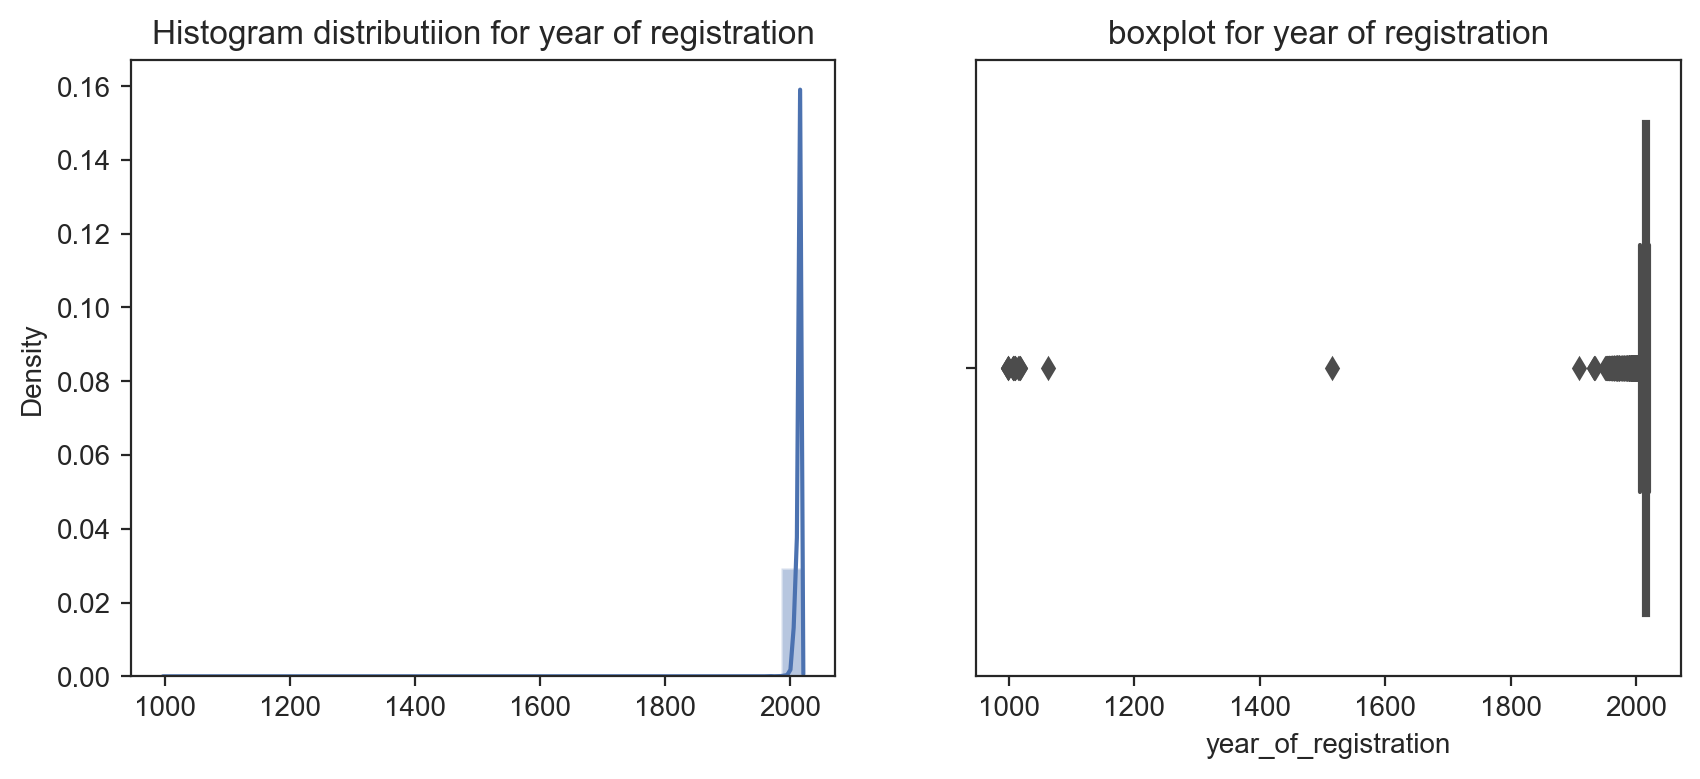

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4));
sns.distplot(x=car_df['year_of_registration'], bins=30, ax=ax[0])
ax[0].set_title("Histogram distributiion for year of registration");
sns.boxplot(data=car_df, x='year_of_registration', ax=ax[1])
ax[1].set_title("boxplot for year of registration");

In [33]:
car_df[(car_df['year_of_registration'].isnull()) & (car_df['vehicle_condition'] == 'NEW')]

public_reference  mileage reg_code standard_colour standard_make  \
0        202006039777689      0.0      NaN            Grey         Volvo   
17       201911043995897      5.0      NaN             NaN        Nissan   
19       202008272998331      0.0      NaN           White    Volkswagen   
37       202001306737473      0.0      NaN           White          Fiat   
44       202003178531910      0.0      NaN             NaN         Honda   
...                  ...      ...      ...             ...           ...   
401860   202010024501227     10.0      NaN          Silver    Mitsubishi   
401890   202010104843364      5.0      NaN             Red           BMW   
401902   202010134960554     10.0      NaN           White           BMW   
401905   202010144983518      0.0      NaN             Red    Land Rover   
401971   202010285515882     10.0      NaN            Grey        Nissan   

            standard_model vehicle_condition  year_of_registration  price  \
0                     XC90               NEW                   NaN  73970   
17                 X-Trail               NEW                   NaN  27595   
19                 T-Cross               NEW                   NaN  25000   
37                   Panda               NEW                   NaN  13999   
44                   Civic               NEW                   NaN  19495   
...                    ...               ...                   ...    ...   
401860        Shogun Sport               NEW                   NaN  31999   
401890                  Z4               NEW                   NaN  47910   
401902            3 Series               NEW                   NaN  35023   
401905  Range Rover Evoque               NEW                   NaN  44995   
401971                Leaf               NEW                   NaN  28820   

          body_type  crossover_car_and_van              fuel_type  
0               SUV                  False  Petrol Plug-in Hybrid  
17              SUV                  False                 Diesel  
19              SUV                  False                 Petrol  
37        Hatchback                  False                 Petrol  
44        Hatchback                  False                 Petrol  
...             ...                    ...                    ...  
401860          SUV                  False                 Diesel  
401890  Convertible                  False                 Petrol  
401902       Saloon                  False                 Petrol  
401905          SUV                  False                 Petrol  
401971    Hatchback                  False               Electric  

[31249 rows x 12 columns]

In [34]:
#Data Cleaning
#All new vehicles has no reg code and year of registeration
#Making an assumption that the data was collected in 2021, 
#then we can assume all the new vehicles to have 2021 as the year of registeration

In [35]:
car_df[(car_df['year_of_registration'].isnull()) & (car_df['vehicle_condition'] == 'NEW')]

public_reference  mileage reg_code standard_colour standard_make  \
0        202006039777689      0.0      NaN            Grey         Volvo   
17       201911043995897      5.0      NaN             NaN        Nissan   
19       202008272998331      0.0      NaN           White    Volkswagen   
37       202001306737473      0.0      NaN           White          Fiat   
44       202003178531910      0.0      NaN             NaN         Honda   
...                  ...      ...      ...             ...           ...   
401860   202010024501227     10.0      NaN          Silver    Mitsubishi   
401890   202010104843364      5.0      NaN             Red           BMW   
401902   202010134960554     10.0      NaN           White           BMW   
401905   202010144983518      0.0      NaN             Red    Land Rover   
401971   202010285515882     10.0      NaN            Grey        Nissan   

            standard_model vehicle_condition  year_of_registration  price  \
0                     XC90               NEW                   NaN  73970   
17                 X-Trail               NEW                   NaN  27595   
19                 T-Cross               NEW                   NaN  25000   
37                   Panda               NEW                   NaN  13999   
44                   Civic               NEW                   NaN  19495   
...                    ...               ...                   ...    ...   
401860        Shogun Sport               NEW                   NaN  31999   
401890                  Z4               NEW                   NaN  47910   
401902            3 Series               NEW                   NaN  35023   
401905  Range Rover Evoque               NEW                   NaN  44995   
401971                Leaf               NEW                   NaN  28820   

          body_type  crossover_car_and_van              fuel_type  
0               SUV                  False  Petrol Plug-in Hybrid  
17              SUV                  False                 Diesel  
19              SUV                  False                 Petrol  
37        Hatchback                  False                 Petrol  
44        Hatchback                  False                 Petrol  
...             ...                    ...                    ...  
401860          SUV                  False                 Diesel  
401890  Convertible                  False                 Petrol  
401902       Saloon                  False                 Petrol  
401905          SUV                  False                 Petrol  
401971    Hatchback                  False               Electric  

[31249 rows x 12 columns]

In [36]:
#All new cars with no year of reg has been replaced with 2021
#since all new vehicles were not registered and has no reg_code
car_df.loc[(car_df['year_of_registration'].isnull()) & (car_df['vehicle_condition'] == 'NEW'), 
           'year_of_registration'] = 2021

In [37]:
car_df.query('year_of_registration == 2021')

public_reference  mileage reg_code standard_colour standard_make  \
0        202006039777689      0.0      NaN            Grey         Volvo   
17       201911043995897      5.0      NaN             NaN        Nissan   
19       202008272998331      0.0      NaN           White    Volkswagen   
37       202001306737473      0.0      NaN           White          Fiat   
44       202003178531910      0.0      NaN             NaN         Honda   
...                  ...      ...      ...             ...           ...   
401860   202010024501227     10.0      NaN          Silver    Mitsubishi   
401890   202010104843364      5.0      NaN             Red           BMW   
401902   202010134960554     10.0      NaN           White           BMW   
401905   202010144983518      0.0      NaN             Red    Land Rover   
401971   202010285515882     10.0      NaN            Grey        Nissan   

            standard_model vehicle_condition  year_of_registration  price  \
0                     XC90               NEW                2021.0  73970   
17                 X-Trail               NEW                2021.0  27595   
19                 T-Cross               NEW                2021.0  25000   
37                   Panda               NEW                2021.0  13999   
44                   Civic               NEW                2021.0  19495   
...                    ...               ...                   ...    ...   
401860        Shogun Sport               NEW                2021.0  31999   
401890                  Z4               NEW                2021.0  47910   
401902            3 Series               NEW                2021.0  35023   
401905  Range Rover Evoque               NEW                2021.0  44995   
401971                Leaf               NEW                2021.0  28820   

          body_type  crossover_car_and_van              fuel_type  
0               SUV                  False  Petrol Plug-in Hybrid  
17              SUV                  False                 Diesel  
19              SUV                  False                 Petrol  
37        Hatchback                  False                 Petrol  
44        Hatchback                  False                 Petrol  
...             ...                    ...                    ...  
401860          SUV                  False                 Diesel  
401890  Convertible                  False                 Petrol  
401902       Saloon                  False                 Petrol  
401905          SUV                  False                 Petrol  
401971    Hatchback                  False               Electric  

[31249 rows x 12 columns]

In [38]:
car_df.isnull().sum()

public_reference             0
mileage                      0
reg_code                 31811
standard_colour           5213
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration      2022
price                        0
body_type                  810
crossover_car_and_van        0
fuel_type                  590
dtype: int64

In [39]:
# car_df['reg_code'] = pd.to_numeric(car_df['reg_code'], errors='coerce')
# car_df['reg_code'] = car_df['reg_code'].astype('Int64')
# car_df['reg_code'].isna().sum()
car_df['reg_code'].unique()

array([nan, '61', '17', '16', '64', '13', '08', '19', '60', '69', '66',
       '12', '18', '65', '09', 'B', '10', '14', '03', '67', '63', '15',
       '68', '56', '20', '70', '62', '11', '05', '59', '58', '02', 'W',
       '57', '06', '52', '04', '07', '55', '51', 'X', 'D', 'S', 'Y', '53',
       '54', 'K', 'V', 'H', 'M', 'L', 'E', 'T', 'N', 'P', 'G', 'J', 'F',
       'R', 'C', '94', 'A', '85', 'CA', 'm', 'FW', '723xuu', '95', 's',
       '38', 'k', '37', 'p'], dtype=object)

In [40]:
# Here, i want to extract the year of registration from the registration code

ext_year = car_df[car_df['year_of_registration'].isnull() 
       & car_df['reg_code'].str.isdigit()]


In [41]:
ext_year['reg_code'] = ext_year['reg_code'].astype('int64')

In [42]:
# if ext_year['reg_code']>=50:
#     ext_year['year_of_registration'] = 2000 + (ext_year['reg_code'].astype('int64') - 50)
ext = ext_year['reg_code'] >= 50
ext_year.loc[ext, 'year_of_registration'] = 2000 + (ext_year.loc[ext, 'reg_code'] - 50)

ext_2 = ext_year['reg_code'] < 50
ext_year.loc[ext_2, 'year_of_registration'] = 2000 + (ext_year.loc[ext_2, 'reg_code'])


In [43]:
# pd.merge(car_df[['public_reference', 'year_of_registration']], ext_year[['public_reference', 
# 'year_of_registration']], on='public_reference', how='inner')


In [44]:
ext_year['reg_code'] = ext_year['reg_code'].astype('object')

In [45]:
# The cardf['year of reg'] has been updated by replacing all the NaN, the year was extracted from
# the reg_code
car_df.update(ext_year['year_of_registration'])


In [46]:
car_df['year_of_registration'].unique()

array([2021., 2011., 2017., 2016., 2015., 2013., 2008., 2019., 2010.,
       2012., 2018., 2009., 1984., 2014., 2003., 2006., 2020., 2005.,
       2002., 2000., 2007., 2004., 2001., 1986., 1998., 1993.,   nan,
       1999., 1970., 1994., 1988., 1990., 1995., 1997., 1969., 1991.,
       1992., 1989., 1987., 2044., 1976., 1983., 1996., 1980., 1973.,
       1962., 1967., 1972., 1982., 1968., 1979., 1964., 2035., 1933.,
       1981., 1985., 1978., 1971., 1974., 1966., 1977., 1961., 1965.,
       1007., 1957., 1515., 1963., 1063., 1954., 1975., 1955., 1009.,
       1016., 1960., 1956., 1959., 1909., 1934., 2045., 1958., 1010.,
       1950., 1008., 1018.,  999., 2038., 1017., 1952., 2037., 1006.,
       1015.])

In [47]:
car_df.isnull().sum()

public_reference             0
mileage                      0
reg_code                 31811
standard_colour           5213
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration       347
price                        0
body_type                  810
crossover_car_and_van        0
fuel_type                  590
dtype: int64

In [48]:
#Extraction of reg code from the year of registeration

In [49]:
ext_reg_code = car_df[car_df['reg_code'].isnull() & car_df['year_of_registration'].notnull()]

In [50]:
track_reg = ext_reg_code['year_of_registration'] > 2000
ext_reg_code.loc[track_reg, 'reg_code'] = (ext_reg_code.loc[track_reg, 'year_of_registration'] - 2000)

track_reg_2 = ext_reg_code['year_of_registration'] == 2000
ext_reg_code.loc[track_reg_2, 'reg_code'] = (ext_reg_code.loc[track_reg_2, 'year_of_registration'] - 2000 + 50)


In [51]:
ext_reg_code['reg_code'].unique()

array([21.0, 19.0, 6.0, 4.0, 17.0, 18.0, 20.0, 5.0, nan, 15.0, 10.0, 13.0,
       12.0, 7.0, 8.0, 16.0, 14.0, 11.0, 3.0, 9.0, 2.0, 50.0, 1.0],
      dtype=object)

In [52]:
ext_reg_code['year_of_registration'].unique()

array([2021., 2019., 2006., 2004., 2017., 2018., 2020., 2005., 1962.,
       2015., 2010., 2013., 1933., 1998., 2012., 2007., 1961., 2008.,
       1997., 2016., 1957., 2014., 1988., 1954., 1999., 1955., 1963.,
       2011., 1960., 1956., 2003., 1959., 2009., 1990., 1992., 2002.,
       1958., 1950., 1966., 2000., 1994., 1973., 1987., 1964., 1995.,
       1952., 2001., 1991.])

In [53]:
car_df.update(ext_reg_code['reg_code'])

In [54]:
car_df.isnull().sum()

public_reference            0
mileage                     0
reg_code                  373
standard_colour          5213
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration      347
price                       0
body_type                 810
crossover_car_and_van       0
fuel_type                 590
dtype: int64

In [55]:
car_df['reg_code'] = pd.to_numeric(car_df['reg_code'], errors='coerce').astype('Int64')


In [56]:
car_df.head()

public_reference   mileage  reg_code standard_colour standard_make  \
0   202006039777689       0.0        21            Grey         Volvo   
1   202007020778260  108230.0        61            Blue        Jaguar   
2   202007020778474    7800.0        17            Grey         SKODA   
3   202007080986776   45000.0        16           Brown      Vauxhall   
4   202007161321269   64000.0        64            Grey    Land Rover   

      standard_model vehicle_condition  year_of_registration  price  \
0               XC90               NEW                2021.0  73970   
1                 XF              USED                2011.0   7000   
2               Yeti              USED                2017.0  14000   
3              Mokka              USED                2016.0   7995   
4  Range Rover Sport              USED                2015.0  26995   

   body_type  crossover_car_and_van              fuel_type  
0        SUV                  False  Petrol Plug-in Hybrid  
1     Saloon                  False                 Diesel  
2        SUV                  False                 Petrol  
3  Hatchback                  False                 Diesel  
4        SUV                  False                 Diesel

In [57]:
# sns.countplot(data=car_df, x='reg_code');
#The

In [58]:
car_df['reg_code'].unique()

<IntegerArray>
[  21,   61,   17,   16,   64,   13,    8,   19,   60,   69,   66,   12,   18,
   65,    9, <NA>,   10,   14,    3,   67,   63,   15,   68,   56,   20,   70,
   62,   11,    5,   59,   58,    2,   57,    6,   52,    4,    7,   55,   51,
   53,   54,   94,   85,   95,   50,   38,    1,   37]
Length: 48, dtype: Int64

In [59]:
# car_df.query("year_of_registration == 1957") #1957 is p
# car_df.query("reg_code == '723xuu'")
# car_df.drop(columns=['reg_code', 'public_reference'], inplace=True)

In [60]:
# Drop duplicate
car_df.drop_duplicates(inplace=True)

In [61]:
# Filling of missing numbers using various techinques depending on the data

#In reg code, the usage of number started in the year 2000, meaning that those before 2000 were in alphabets
# Here, I am filling the reg code and the year of registration by fillling the null values wit
#the values of the forward rows to filll in
# car_df['reg_code'].fillna(method='ffill', inplace=True)
# car_df['year_of_registration'].fillna(method='ffill', inplace=True)

#since this are categorical values, i majorly filled them with the mode values
car_df['standard_colour'].fillna(car_df['standard_colour'].mode()[0], inplace=True)
car_df['body_type'].fillna(car_df['body_type'].mode()[0], inplace=True)
car_df['fuel_type'].fillna(car_df['fuel_type'].mode()[0], inplace=True)

In [62]:
# Drop all the row with missing values
car_df.dropna(inplace=True)

In [63]:
car_df.isnull().sum()

public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

In [64]:
car_df[car_df['year_of_registration'] < 1999]

public_reference   mileage  reg_code standard_colour  standard_make  \
59010    202006270588110   14000.0         7            Blue         Toyota   
59647    202002247665418    7000.0         6             Red             MG   
69516    202010155035879   96659.0        65           Black           Audi   
84501    202009163810376   37771.0        63           Black          Smart   
102131   202008262973022   32000.0        61          Yellow    Rolls-Royce   
114737   202008102305925   30000.0        59             Red         Toyota   
120858   202010064654489   27200.0        66           Black           MINI   
148003   202010104836987   31172.0         9           Black        Hyundai   
190556   202010205206488   58470.0        10           Black           Fiat   
199830   202009013167637   23000.0        59          Silver           MINI   
199987   202010225311657  104000.0         8          Silver            BMW   
201616   202010134937656    8600.0        68          Silver            BMW   
201626   202010155037484   69346.0        64             Red          Mazda   
201773   202008042076716   19000.0        57          Silver  Mercedes-Benz   
205758   202009274272833   30465.0        62            Blue         Austin   
213059   202009304380359   54569.0         8          Silver            BMW   
274622   202010024511934    6353.0        17            Blue            BMW   
334679   202010094789497  107934.0        13            Blue           Audi   
339167   202006270588115   38000.0        57           White           MINI   
354336   202007131200286   10000.0        51           Green        Triumph   
374798   202008042076722   58000.0        55          Silver         Toyota   
387633   202010195174849   39624.0        65             Red           MINI   

       standard_model vehicle_condition  year_of_registration   price  \
59010           Prius              USED                1007.0    7000   
59647             MGB              USED                1968.0   19500   
69516        A4 Avant              USED                1515.0   10385   
84501          fortwo              USED                1063.0    4785   
102131           Dawn              USED                1961.0  290000   
114737           AYGO              USED                1009.0    4695   
120858        Clubman              USED                1016.0   18990   
148003            i10              USED                1909.0    3950   
190556      Punto Evo              USED                1010.0    3785   
199830          Hatch              USED                1009.0    5995   
199987       1 Series              USED                1008.0    4395   
201616             M2              USED                1018.0   41990   
201626         Mazda3              USED                 999.0    8795   
201773        C Class              USED                1007.0    7295   
205758           Mini              USED                1962.0   20995   
213059             Z4              USED                 999.0    7999   
274622       2 Series              USED                1017.0   18990   
334679             A3              USED                 999.0    8895   
339167          Hatch              USED                1007.0    4795   
354336         Renown              USED                1952.0   10995   
374798           RAV4              USED                1006.0    5994   
387633        Clubman              USED                1015.0   15290   

          body_type  crossover_car_and_van      fuel_type  
59010     Hatchback                  False  Petrol Hybrid  
59647   Convertible                  False         Petrol  
69516        Estate                  False         Diesel  
84501         Coupe                  False         Petrol  
102131  Convertible                  False         Petrol  
114737    Hatchback                  False         Petrol  
120858       Estate                  False         Diesel  
148003    Hatchback           

<Axes: ylabel='Density'>

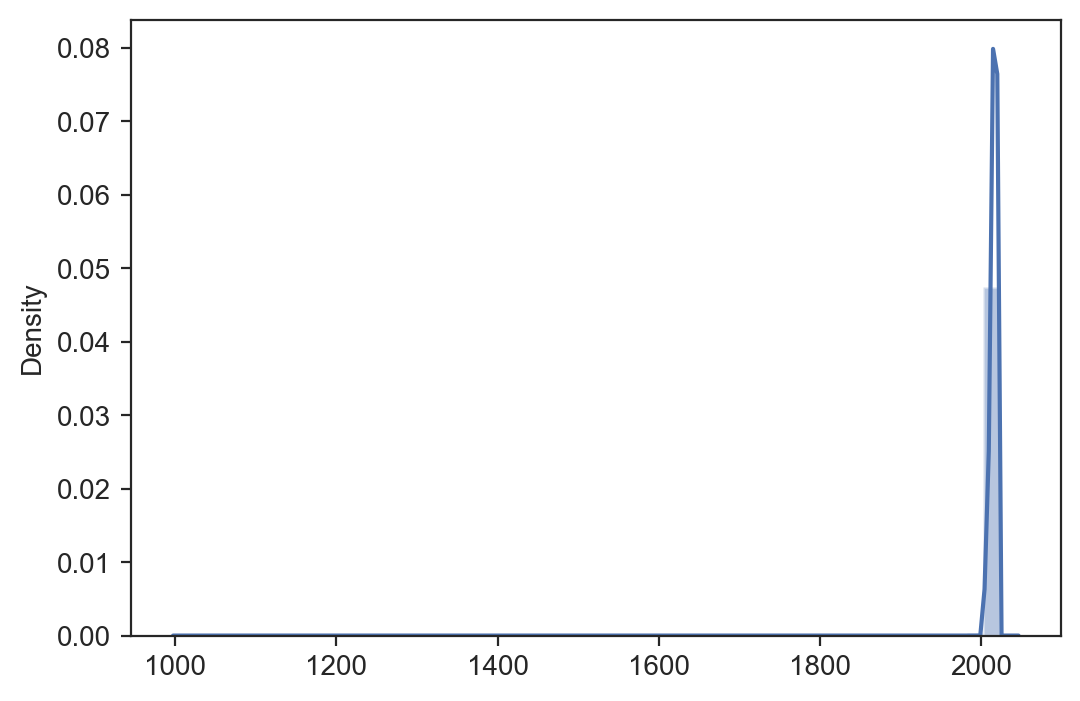

In [65]:
sns.distplot( x=car_df['year_of_registration'])

In [66]:
# car_df.query('year_of_registration <= 1952')
# car_df['year_of_registration'].value_counts()


In [67]:

car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390892 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       390892 non-null  int64  
 1   mileage                390892 non-null  float64
 2   reg_code               390892 non-null  Int64  
 3   standard_colour        390892 non-null  object 
 4   standard_make          390892 non-null  object 
 5   standard_model         390892 non-null  object 
 6   vehicle_condition      390892 non-null  object 
 7   year_of_registration   390892 non-null  float64
 8   price                  390892 non-null  int64  
 9   body_type              390892 non-null  object 
 10  crossover_car_and_van  390892 non-null  bool   
 11  fuel_type              390892 non-null  object 
dtypes: Int64(1), bool(1), float64(2), int64(2), object(6)
memory usage: 36.5+ MB


In [68]:
car_df[car_df['year_of_registration'] >= 1999]

public_reference   mileage  reg_code standard_colour standard_make  \
0        202006039777689       0.0        21            Grey         Volvo   
1        202007020778260  108230.0        61            Blue        Jaguar   
2        202007020778474    7800.0        17            Grey         SKODA   
3        202007080986776   45000.0        16           Brown      Vauxhall   
4        202007161321269   64000.0        64            Grey    Land Rover   
...                  ...       ...       ...             ...           ...   
402000   202010315652942    5179.0        69            Grey       Peugeot   
402001   202010315657341  110000.0        59             Red       Peugeot   
402002   202010315659271   52760.0        62           White        Nissan   
402003   202011015662436   10250.0        65             Red        Abarth   
402004   201512149444029   14000.0        14          Silver          Audi   

           standard_model vehicle_condition  year_of_registration  price  \
0                    XC90               NEW                2021.0  73970   
1                      XF              USED                2011.0   7000   
2                    Yeti              USED                2017.0  14000   
3                   Mokka              USED                2016.0   7995   
4       Range Rover Sport              USED                2015.0  26995   
...                   ...               ...                   ...    ...   
402000                208              USED                2019.0  10595   
402001                107              USED                2009.0   2000   
402002            Qashqai              USED                2012.0   7250   
402003                595              USED                2015.0  11490   
402004           A4 Avant              USED                2014.0  20520   

        body_type  crossover_car_and_van              fuel_type  
0             SUV                  False  Petrol Plug-in Hybrid  
1          Saloon                  False                 Diesel  
2             SUV                  False                 Petrol  
3       Hatchback                  False                 Diesel  
4             SUV                  False                 Diesel  
...           ...                    ...                    ...  
402000  Hatchback                  False                 Petrol  
402001  Hatchback                  False                 Petrol  
402002        SUV                  False                 Petrol  
402003  Hatchback                  False                 Petrol  
402004     Estate                  False                 Diesel  

[390870 rows x 12 columns]

In [69]:
Q1 = car_df['year_of_registration'].quantile(0.25)
Q3 = car_df['year_of_registration'].quantile(0.75)
IQR = Q3 - Q1
car_df = car_df[(car_df['year_of_registration'] >= Q1 - 3* IQR) & (car_df['year_of_registration'] <= Q3 + 3* IQR)]


In [70]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390863 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       390863 non-null  int64  
 1   mileage                390863 non-null  float64
 2   reg_code               390863 non-null  Int64  
 3   standard_colour        390863 non-null  object 
 4   standard_make          390863 non-null  object 
 5   standard_model         390863 non-null  object 
 6   vehicle_condition      390863 non-null  object 
 7   year_of_registration   390863 non-null  float64
 8   price                  390863 non-null  int64  
 9   body_type              390863 non-null  object 
 10  crossover_car_and_van  390863 non-null  bool   
 11  fuel_type              390863 non-null  object 
dtypes: Int64(1), bool(1), float64(2), int64(2), object(6)
memory usage: 36.5+ MB


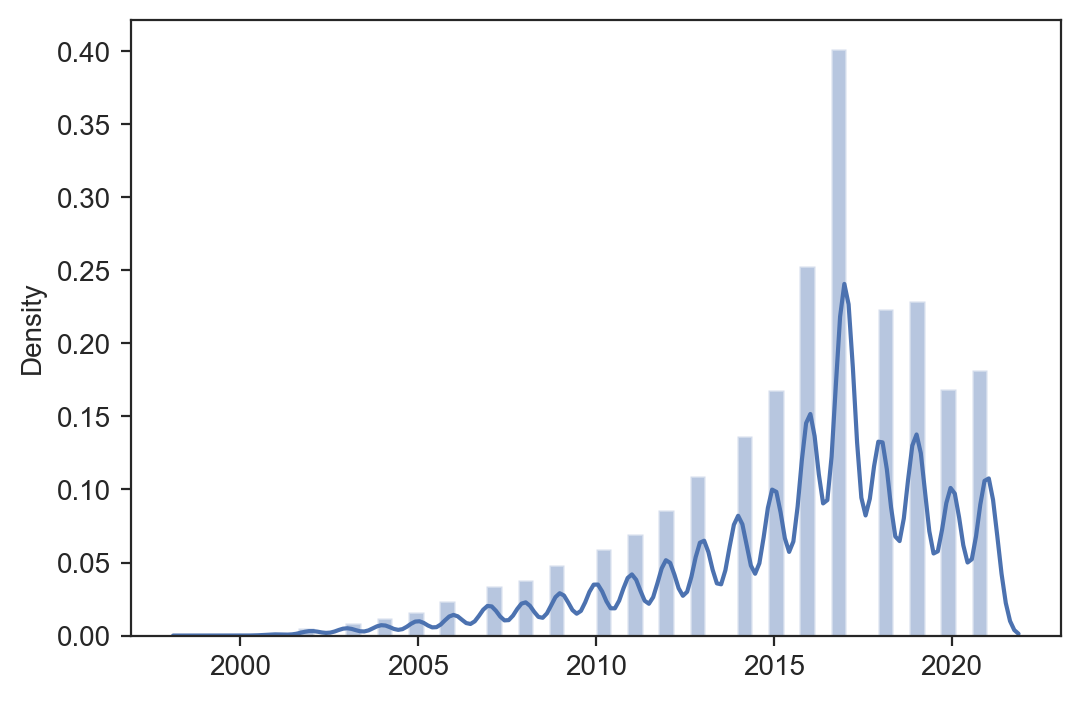

In [71]:
sns.distplot( x=car_df['year_of_registration']);

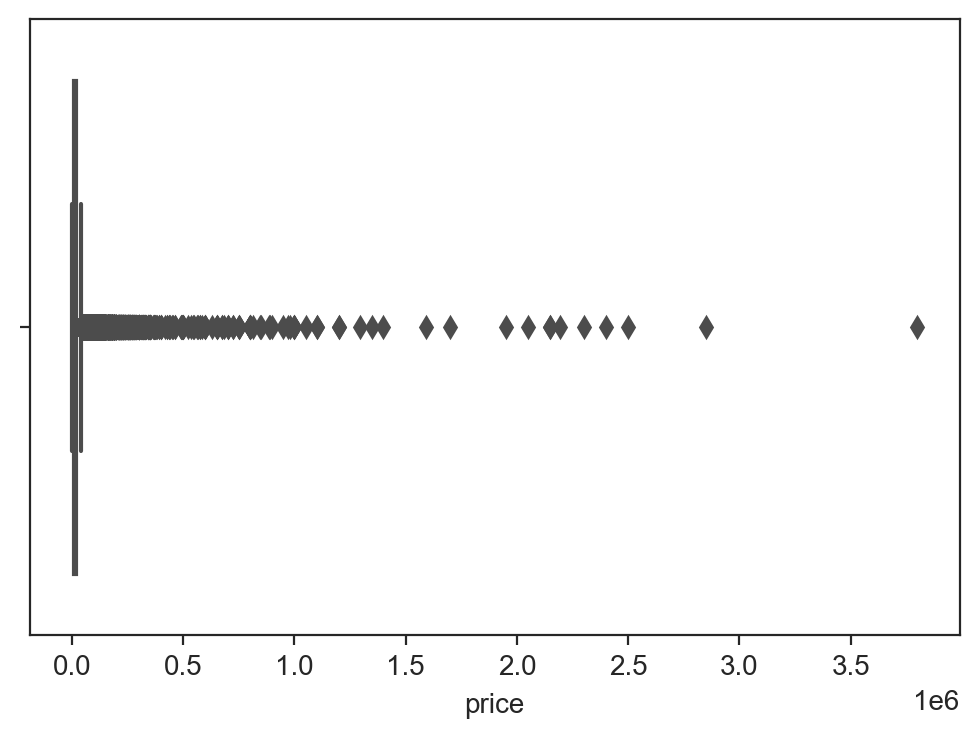

In [72]:
sns.boxplot(data=car_df, x='price');

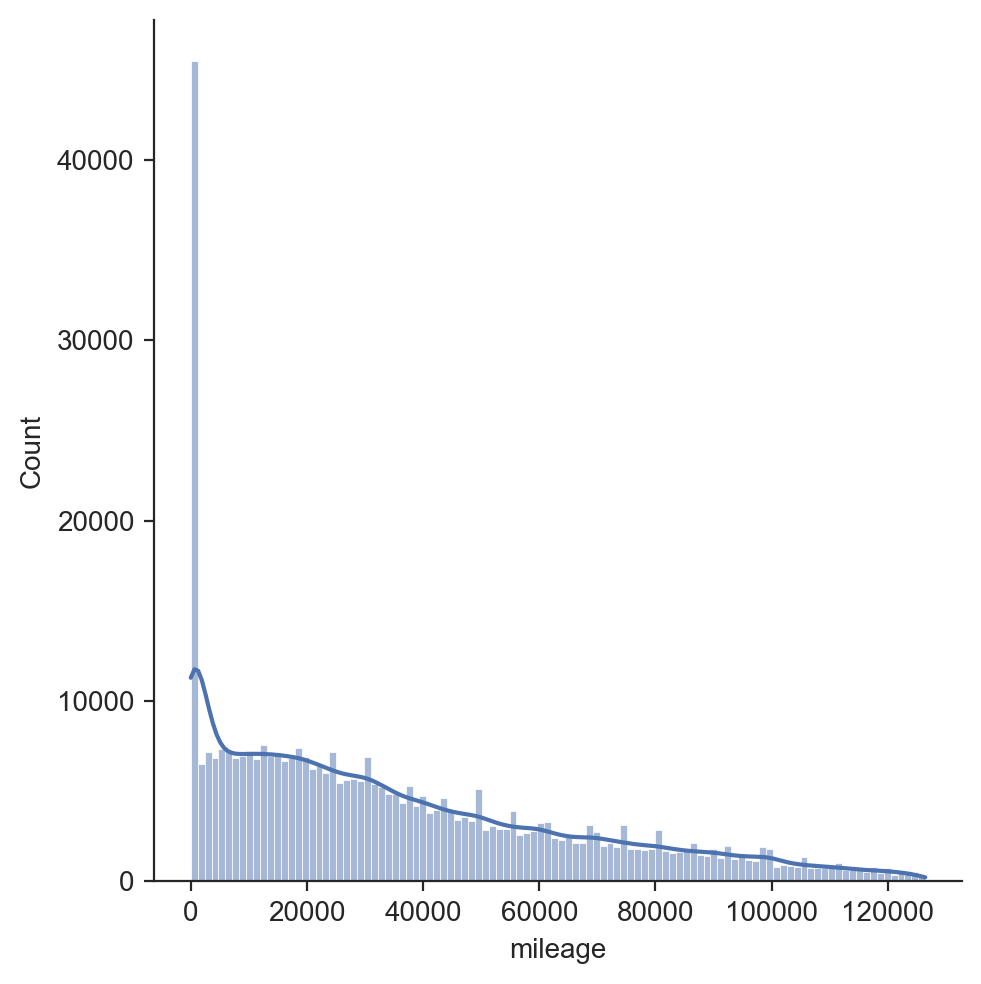

In [73]:
sns.displot( data=car_df, x='mileage', kde=True);

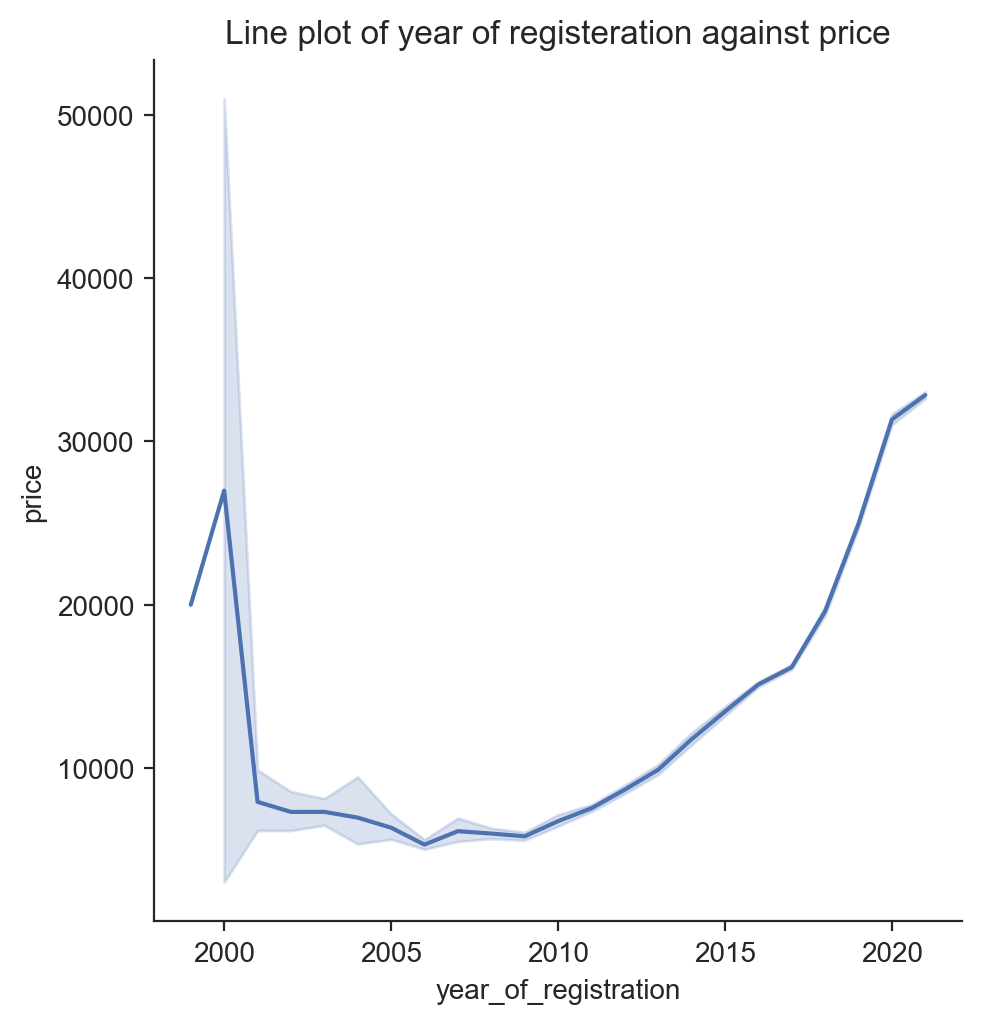

In [74]:
sns.relplot(data=car_df, x='year_of_registration', y='price', kind='line');
plt.title("Line plot of year of registeration against price");

In [75]:
car_df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390863 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       390863 non-null  int64  
 1   mileage                390863 non-null  float64
 2   reg_code               390863 non-null  Int64  
 3   standard_colour        390863 non-null  object 
 4   standard_make          390863 non-null  object 
 5   standard_model         390863 non-null  object 
 6   vehicle_condition      390863 non-null  object 
 7   year_of_registration   390863 non-null  float64
 8   price                  390863 non-null  int64  
 9   body_type              390863 non-null  object 
 10  crossover_car_and_van  390863 non-null  bool   
 11  fuel_type              390863 non-null  object 
dtypes: Int64(1), bool(1), float64(2), int64(2), object(6)
memory usage: 44.6+ MB


In [76]:
car_df.corr();

In [77]:
#Standardization of data to lower case

lower_cols = ['standard_colour', 'standard_make', 'standard_model', 'vehicle_condition', 'body_type']

car_df[lower_cols] = car_df[lower_cols].apply(lambda x: x.str.lower())

car_df.head()

public_reference   mileage  reg_code standard_colour standard_make  \
0   202006039777689       0.0        21            grey         volvo   
1   202007020778260  108230.0        61            blue        jaguar   
2   202007020778474    7800.0        17            grey         skoda   
3   202007080986776   45000.0        16           brown      vauxhall   
4   202007161321269   64000.0        64            grey    land rover   

      standard_model vehicle_condition  year_of_registration  price  \
0               xc90               new                2021.0  73970   
1                 xf              used                2011.0   7000   
2               yeti              used                2017.0  14000   
3              mokka              used                2016.0   7995   
4  range rover sport              used                2015.0  26995   

   body_type  crossover_car_and_van              fuel_type  
0        suv                  False  Petrol Plug-in Hybrid  
1     saloon                  False                 Diesel  
2        suv                  False                 Petrol  
3  hatchback                  False                 Diesel  
4        suv                  False                 Diesel

DATA PREPROCESSING: Feature Engineering

In [78]:
#The mileage of cars can be a predictive measure to understanding the price of a car,
#I can as well convert this continuous variable to categorical, indication whether the car is
#of low mileage, or medium or high
#This is known as bucketing or binning


car_df['mileage_level'] = pd.cut(
    car_df['mileage'],
    bins=[-1, 50000, 100000, float('inf')], 
    labels=['low', 'medium', 'high']
)

In [79]:
car_df.head()

public_reference   mileage  reg_code standard_colour standard_make  \
0   202006039777689       0.0        21            grey         volvo   
1   202007020778260  108230.0        61            blue        jaguar   
2   202007020778474    7800.0        17            grey         skoda   
3   202007080986776   45000.0        16           brown      vauxhall   
4   202007161321269   64000.0        64            grey    land rover   

      standard_model vehicle_condition  year_of_registration  price  \
0               xc90               new                2021.0  73970   
1                 xf              used                2011.0   7000   
2               yeti              used                2017.0  14000   
3              mokka              used                2016.0   7995   
4  range rover sport              used                2015.0  26995   

   body_type  crossover_car_and_van              fuel_type mileage_level  
0        suv                  False  Petrol Plug-in Hybrid           low  
1     saloon                  False                 Diesel          high  
2        suv                  False                 Petrol           low  
3  hatchback                  False                 Diesel           low  
4        suv                  False                 Diesel        medium

In [80]:
#To determione the number of years a car has been used, i will create a column to determine
#the vehicle age
car_df['vehicle_age'] = (2021 - car_df['year_of_registration'])

In [81]:
# This is the formation of column calculating the car mileage per year
car_df['mileage_per_year'] = (car_df['mileage']/car_df['vehicle_age']).round()
car_df.head()

public_reference   mileage  reg_code standard_colour standard_make  \
0   202006039777689       0.0        21            grey         volvo   
1   202007020778260  108230.0        61            blue        jaguar   
2   202007020778474    7800.0        17            grey         skoda   
3   202007080986776   45000.0        16           brown      vauxhall   
4   202007161321269   64000.0        64            grey    land rover   

      standard_model vehicle_condition  year_of_registration  price  \
0               xc90               new                2021.0  73970   
1                 xf              used                2011.0   7000   
2               yeti              used                2017.0  14000   
3              mokka              used                2016.0   7995   
4  range rover sport              used                2015.0  26995   

   body_type  crossover_car_and_van              fuel_type mileage_level  \
0        suv                  False  Petrol Plug-in Hybrid           low   
1     saloon                  False                 Diesel          high   
2        suv                  False                 Petrol           low   
3  hatchback                  False                 Diesel           low   
4        suv                  False                 Diesel        medium   

   vehicle_age  mileage_per_year  
0          0.0               NaN  
1         10.0           10823.0  
2          4.0            1950.0  
3          5.0            9000.0  
4          6.0           10667.0

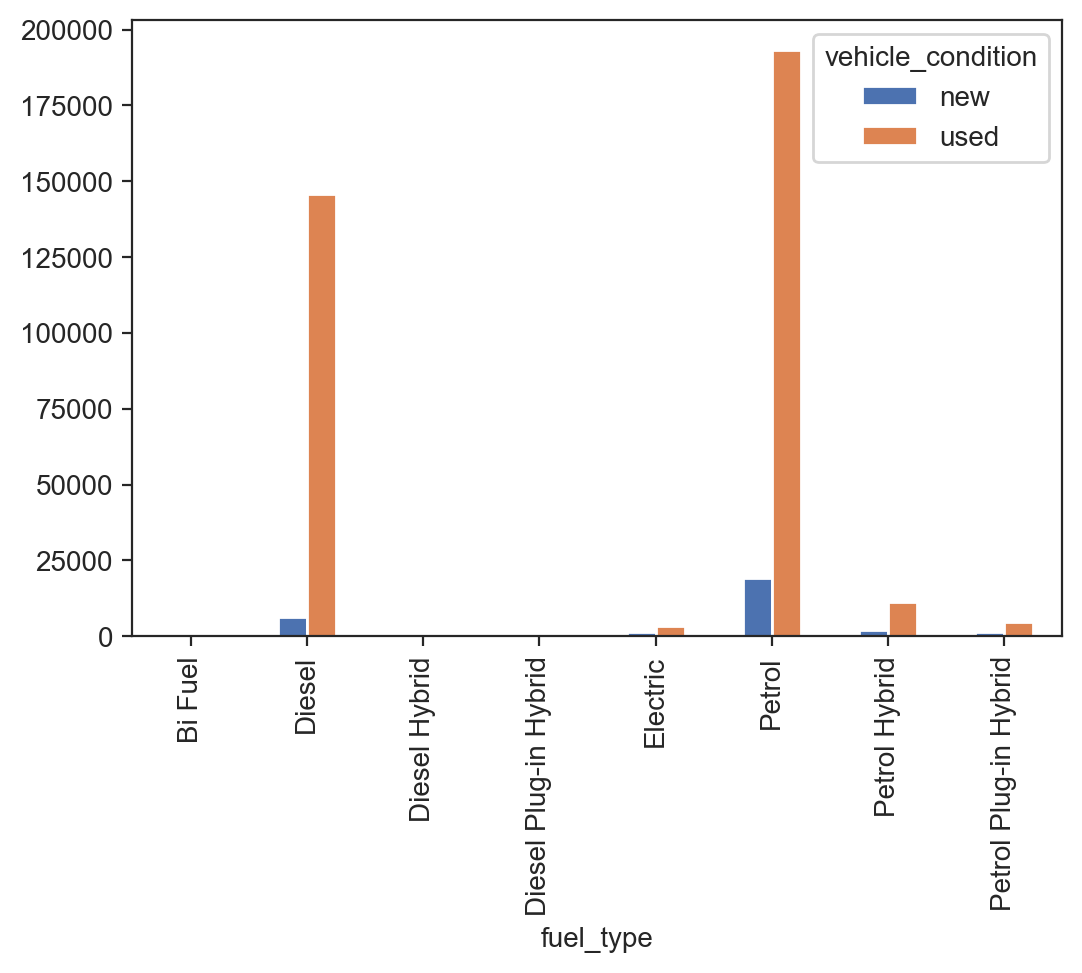

In [82]:
car_df.groupby('fuel_type')['vehicle_condition'].value_counts().unstack('vehicle_condition').plot.bar();

#The car that is more purchased are the petrol used vehicles followed by the used diesel vehicle

In [83]:
#The 10 most purchased brand/standard_make
# car_df['standard_make'].value_counts().head(10)
car_df[car_df['standard_make'] == 'bmw'].groupby('fuel_type')['vehicle_condition'].value_counts()

# more diesel cars of bmw were bought and they were all used

fuel_type              vehicle_condition
Diesel                 used                 21195
                       new                    534
Diesel Hybrid          used                   259
                       new                    175
Electric               used                   237
                       new                     21
Petrol                 used                 11356
                       new                    680
Petrol Hybrid          used                   336
                       new                     10
Petrol Plug-in Hybrid  used                   977
                       new                    172
Name: vehicle_condition, dtype: int64

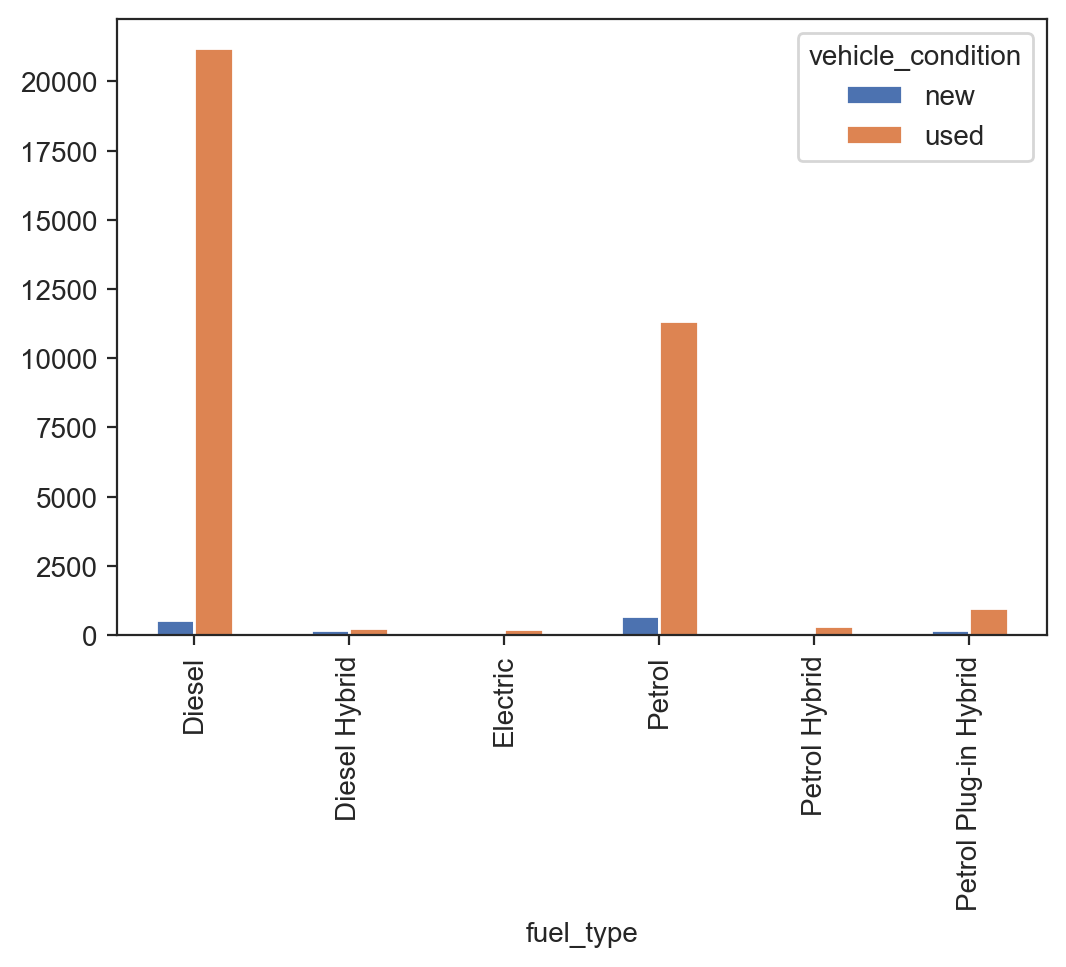

In [84]:
(car_df[car_df['standard_make'] == 'bmw']
 .groupby('fuel_type')['vehicle_condition']
 .value_counts()
 .unstack('vehicle_condition')
 .plot.bar()
);



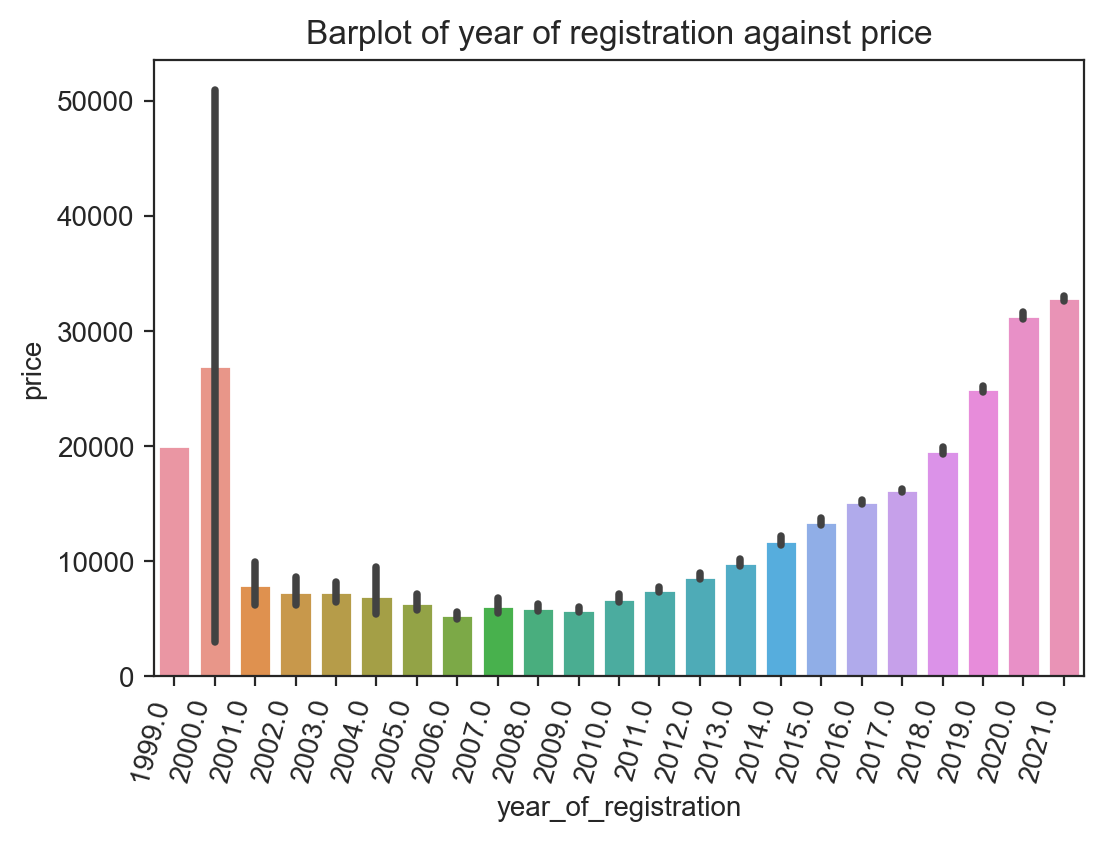

In [85]:
# car_df.groupby('year_of_registration')['price'].sum()

ax = sns.barplot(data=car_df, x='year_of_registration', y='price');
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha="right");
plt.title("Barplot of year of registration against price")
plt.show()

# car_df.query('year_of_registration < 1900')
# car_df.query('standard_model =="prius"')

In [86]:
# sns.regplot(data=car_df, y='year_of_registration', x='mileage')

In [87]:
car_df['standard_make'].value_counts().head(10)

bmw              35952
audi             34223
vauxhall         33154
volkswagen       33135
mercedes-benz    30779
nissan           19591
toyota           17038
peugeot          14927
land rover       14142
renault          12643
Name: standard_make, dtype: int64

In [88]:
(car_df[car_df['standard_make'] == 'bmw']
 .groupby(['standard_model', 'vehicle_condition'])
 [['price']]
 .agg(['min', 'max', 'mean']).unstack(1)
)

#BMW is widely most purchased vehicle, the min and max value of the vehicle based
#on the condition is revealed here. So i can easily see the price for he cars based on their levels
#The values with NaN, indicates that the vehicle doesn't have a new type, they are all used

price                                \
                                min                 max             
vehicle_condition               new      used       new      used   
standard_model                                                      
1 series                    22098.0     950.0   44330.0   49995.0   
2 series                    27900.0    7695.0   43025.0   39990.0   
2 series active tourer      24207.0    6599.0   39555.0   41880.0   
2 series gran coupe         24890.0   24450.0   43900.0   36980.0   
2 series gran tourer        26980.0    7989.0   36129.0   35830.0   
3 series                    32692.0     500.0   58000.0  158500.0   
3 series gran turismo           NaN    7900.0       NaN   28910.0   
4 series                    34118.0    8749.0   64995.0   65452.0   
4 series gran coupe         32396.0    8800.0   44910.0   43000.0   
5 series                    34289.0     999.0   68933.0  117400.0   
5 series gran turismo           NaN    7950.0       NaN   25985.0   
6 series                        NaN    2995.0       NaN   35950.0   
6 series gran coupe             NaN   13490.0       NaN   32995.0   
6 series gran turismo       40999.0   23059.0   49610.0   45000.0   
7 series                    49995.0    2490.0  110399.0   85950.0   
8 series                    57480.0   47950.0  108245.0   84995.0   
8 series gran coupe         55780.0   49949.0   97995.0   84898.0   
alpina b3                       NaN    8795.0       NaN   85000.0   
alpina b3 bi-turbo              NaN   12500.0       NaN   89990.0   
alpina b4                       NaN   38000.0       NaN   38000.0   
alpina b5                       NaN   16750.0       NaN  106500.0   
alpina b6                       NaN   24950.0       NaN   24950.0   
alpina b7                       NaN   55997.0       NaN   55997.0   
alpina d3                       NaN    5500.0       NaN   28995.0   
alpina d3 bi-turbo              NaN    6999.0       NaN   29000.0   
alpina d4                       NaN   27995.0       NaN   36500.0   
alpina d4 bi-turbo              NaN   24480.0       NaN   24480.0   
alpina d5 bi-turbo              NaN   18995.0       NaN   52990.0   
alpina unspecified models       NaN    9995.0       NaN   57500.0   
alpina xd3 bi-turbo             NaN   22995.0       NaN   71265.0   
i3                          29890.0   10500.0   42725.0   41230.0   
i8                              NaN   32999.0       NaN   79990.0   
m2                          48171.0   23950.0   63010.0   87995.0   
m3                              NaN    8750.0       NaN   66995.0   
m4                          50950.0   21490.0   74245.0   92500.0   
m5                          84390.0   11489.0  109405.0   98160.0   
m6                              NaN   11495.0       NaN   49990.0   
m6 gran coupe                   NaN   26995.0       NaN   44490.0   
m8                         101490.0   85990.0  123000.0   97450.0   
m8 gran coupe              109625.0   99950.0  110995.0  114995.0   
x1                          28890.0    4199.0   44010.0   44540.0   
x2                          29025.0   18499.0   46290.0   48560.0   
x3                          39890.0    2295.0   59475.0   54991.0   
x3 m                        63690.0   55500.0   87530.0   77330.0   
x4                          43980.0   14988.0   58994.0   62220.0   
x4 m                        66290.0   53000.0   89390.0   66990.0   
x5                          55935.0    1995.0  111495.0   80000.0   
x5 m                       106330.0   21980.0  117620.0  109990.0   
x5m                         99980.0   39989.0  117650.0  101950.0   
x6                          59980.0    8990.0   89995.0   77995.0   
x6 m                       105725.0   18995.0  122445.0  109950.0   
x6m                        103140.0   21475.0  120720.0   98995.0   
x7                          68980.0   58980.0  115450.0   92290.0   
z3                              NaN    2790.0       NaN    9950.0   
z3m                         

In [89]:
(car_df[car_df['standard_make'] == 'mercedes-benz']
 .groupby(['standard_make', 'standard_model', 'body_type'])
 [['price', 'mileage']]
 .agg(['min', 'max', 'mean'])
)


price                        mileage  \
                                          min     max          mean      min   
standard_make standard_model body_type                                         
mercedes-benz 190            saloon      7995    7995   7995.000000  53000.0   
              200            estate     15999   23000  19499.500000   6404.0   
                             hatchback  16000   20490  17828.333333  19594.0   
              220            hatchback  12000   12000  12000.000000  67558.0   
                             saloon     16700   18850  17775.000000  29000.0   
...                                       ...     ...           ...      ...   
              vito           combi van  12495   26895  18502.416667  11500.0   
                             hatchback  11995   29990  21770.900000    500.0   
                             minibus     5900  109900  22765.985507    500.0   
                             panel van   8000   18500  11915.000000  39000.0   
              x class        pickup     20995   69995  40779.866667      0.0   

                                                                
                                             max          mean  
standard_make standard_model body_type                          
mercedes-benz 190            saloon      53000.0  53000.000000  
              200            estate      34558.0  20481.000000  
                             hatchback   41500.0  30031.333333  
              220            hatchback   67558.0  67558.000000  
                             saloon      96000.0  62500.000000  
...                                          ...           ...  
              vito           combi van  125000.0  63508.583333  
                             hatchback   81000.0  32222.500000  
                             minibus    125000.0  42034.115942  
                             panel van  117000.0  75602.400000  
              x class        pickup      56050.0  16326.000000  

[80 rows x 6 columns]

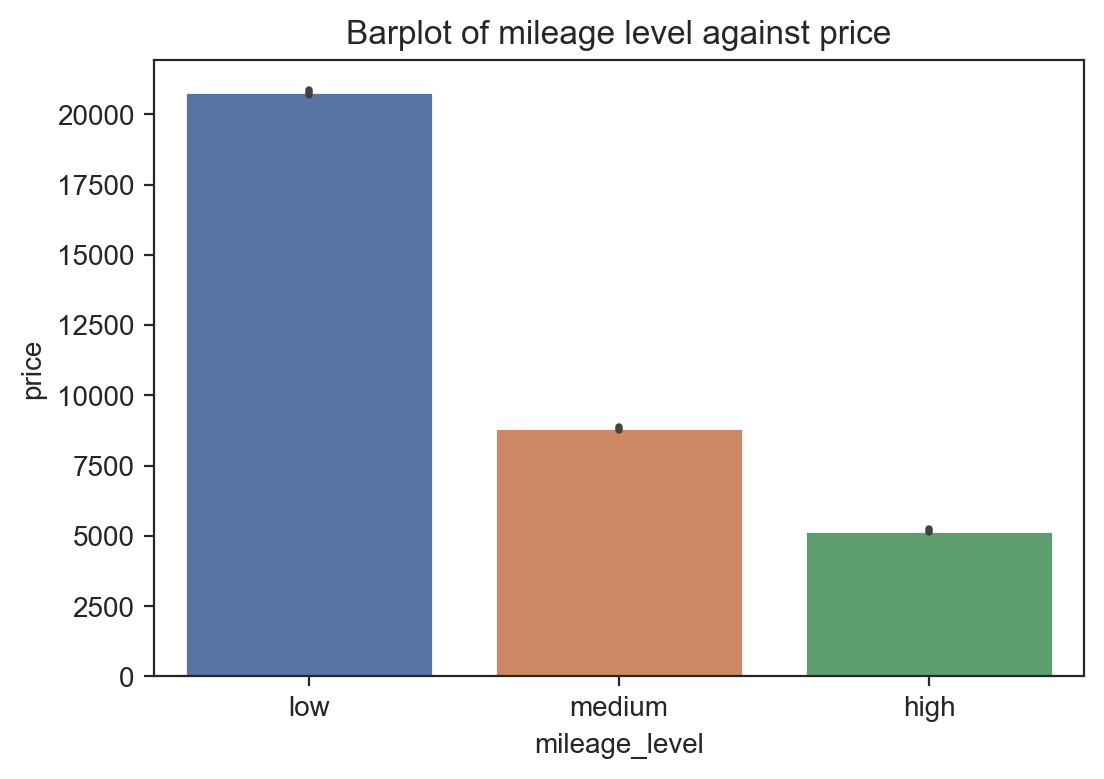

In [90]:
sns.barplot(data=car_df, x='mileage_level', y='price');
plt.title("Barplot of mileage level against price");
#The price decreases as the mileage level increases, the average
#price for vehicles with low mileage,
#is aroud 21,000, while the medium and low are 8,500 and 5,000 respectively

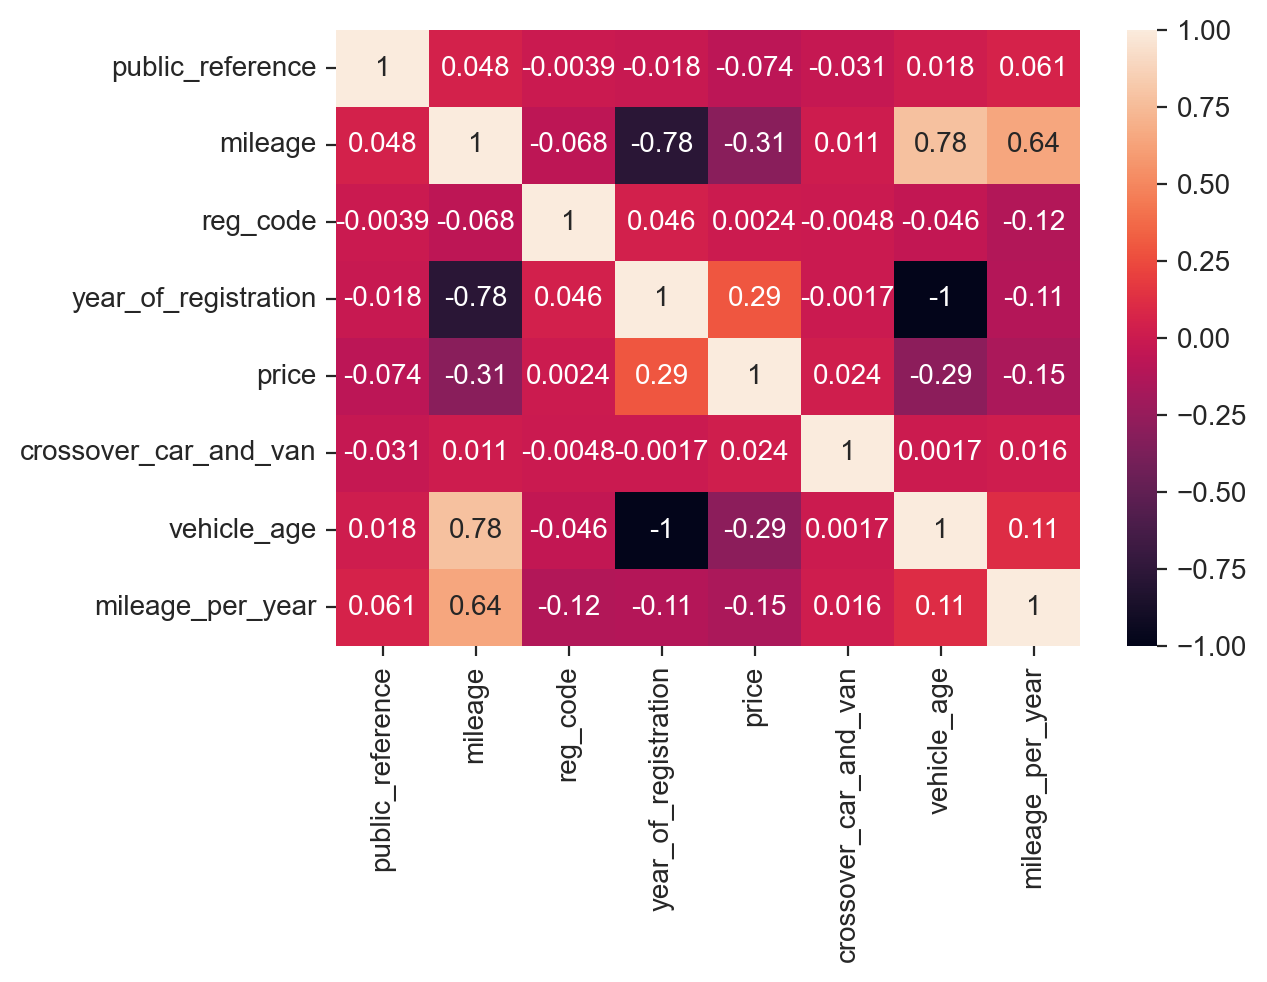

In [91]:
sns.heatmap(car_df.corr(), annot=True);

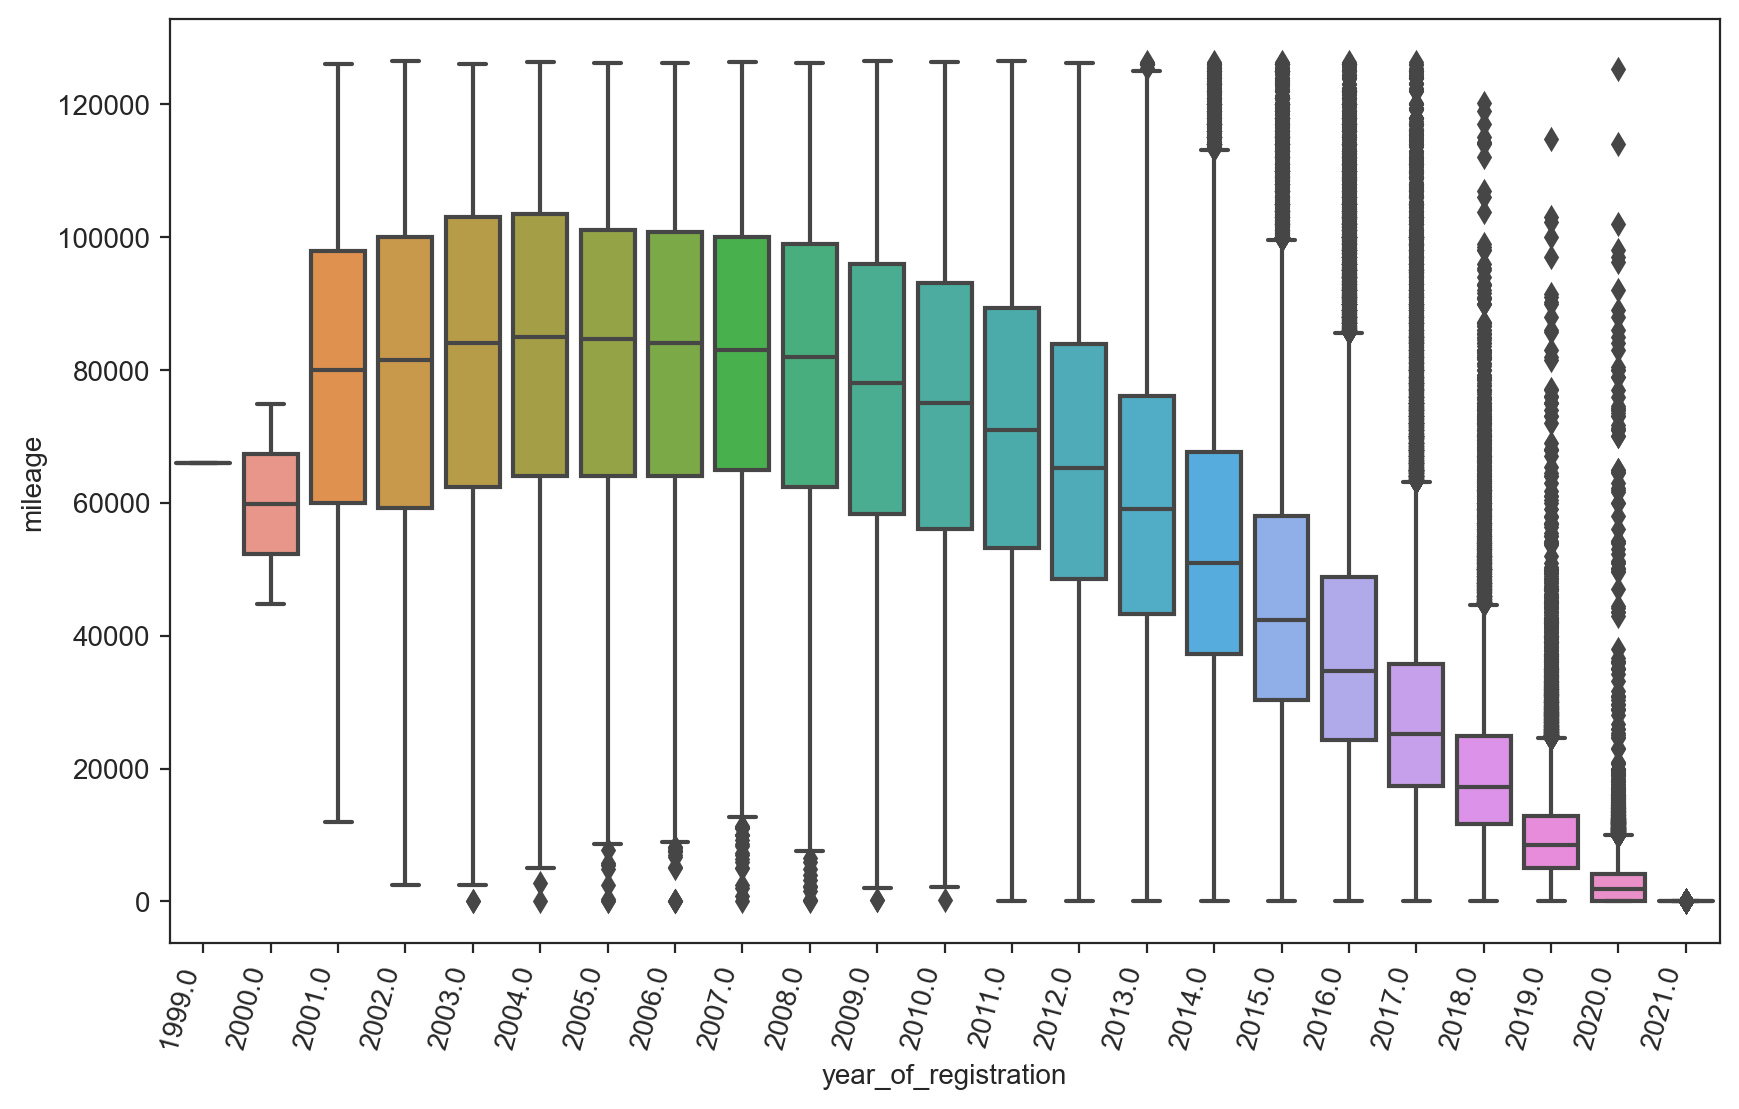

In [92]:
plt.subplots(figsize=(10,6))

ax = sns.boxplot(data=car_df, x='year_of_registration', y='mileage')
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha="right")

plt.show()

In [93]:
# flights.pivot(index="year", columns="month", values="passengers")

In [94]:
car_df.groupby(['year_of_registration', 'standard_make'])[['mileage', 'price']].mean()

mileage         price
year_of_registration standard_make                            
1999.0               chevrolet      66000.000000  19995.000000
2000.0               ferrari        44800.000000  50980.000000
                     mazda          74815.000000   3000.000000
2001.0               alfa romeo     73611.250000   6936.250000
                     aston martin   56875.000000  34611.000000
...                                          ...           ...
2021.0               suzuki             7.167266  18933.115108
                     toyota             7.063647  26418.514076
                     vauxhall           6.836401  21866.669734
                     volkswagen         7.344828  25083.754628
                     volvo              1.354645  48626.102897

[1083 rows x 2 columns]

In [95]:
idx_pr = car_df.groupby(['year_of_registration'])['price'].idxmax()
car_df.loc[idx_pr]

#COupe vehiicles are more expensive in each year, and they are all used vehicles with low mileage
#Most of this cars are all petrol vehicles

public_reference  mileage  reg_code standard_colour  standard_make  \
281446   202010235350647  66000.0        52          silver      chevrolet   
261866   202009264226394  44800.0        50             red        ferrari   
391655   201910243670793  13344.0        51           black        porsche   
250454   201809110374480   5986.0        52           green         jaguar   
199481   202008283029126  20000.0        53          silver        ferrari   
313958   202002197496987   7750.0        54           black        ferrari   
13729    202006250521618   4800.0         5          silver        porsche   
9329     201907119952139  12260.0         6             red        ferrari   
201413   202001095954708    828.0        57           black        bugatti   
392061   202008283052830   2121.0        57           black  mercedes-benz   
165068   202010275499136  10250.0         9             red        ferrari   
21997    201911084154244   2180.0        10            blue        bugatti   
219315   202003208617837   6638.0        11             red        ferrari   
204590   202010165086329  19972.0        12             red        ferrari   
145819   202007070959470   6170.0        63             red        ferrari   
51741    202002257718775   4400.0        14           black        bugatti   
72681    202007010711087    475.0        15          yellow        ferrari   
103974   202010074708314  10895.0        16            blue        bugatti   
198060   202008252907180    300.0        17           black        ferrari   
223835   202007081011555   1000.0        67            blue        bugatti   
289514   202010225285486   1500.0        15          yellow        porsche   
264371   201911084150187    600.0        20           black        bugatti   
163919   202010074703855     10.0        21            blue           audi   

       standard_model vehicle_condition  year_of_registration    price  \
281446       corvette              used                1999.0    19995   
261866            360              used                2000.0    50980   
391655            911              used                2001.0   109950   
250454          xj220              used                2002.0   399995   
199481            360              used                2003.0   199995   
313958           enzo              used                2004.0  1950000   
13729      carrera gt              used                2005.0   675000   
9329     superamerica              used                2006.0   255000   
201413         veyron              used                2007.0  1295000   
392061    slr mclaren              used                2008.0   339990   
165068           f430              used                2009.0   299995   
21997          veyron              used                2010.0  1590000   
219315            599              used                2011.0   489990   
204590            365              used                2012.0   999999   
145819      laferrari              used                2013.0  2150000   
51741          veyron              used                2014.0  2850000   
72681       laferrari              used                2015.0  2299950   
103974         veyron              used                2016.0  1699995   
198060      laferrari              used                2017.0  3799995   
223835         chiron              used                2018.0  2500000   
289514            918              used                2019.0  1200000   
264371         veyron              used                2020.0  1400000   
163919             a3               new                2021.0   293635   

          body_type  crossover_car_and_van              fuel_type  \
281446        coupe                  False                 Petrol   
261866        coupe                  False                 Petrol   
391655        coupe                  False                 Petrol   
250454        coupe                  False                 Petrol   
199481       

In [96]:
car_df_petrol = car_df[car_df['fuel_type'] == 'Petrol']


In [97]:

(car_df_petrol
 .groupby(['mileage_level', 'vehicle_condition'])
 ['price']
 .mean()
)

# The average price for vehicles which are new and have low mileage is 26,900,
# there is no new vehicle with medium and high mileage

mileage_level  vehicle_condition
low            new                  26900.598180
               used                 18123.822467
medium         new                           NaN
               used                  6388.441320
high           new                           NaN
               used                  3330.518955
Name: price, dtype: float64

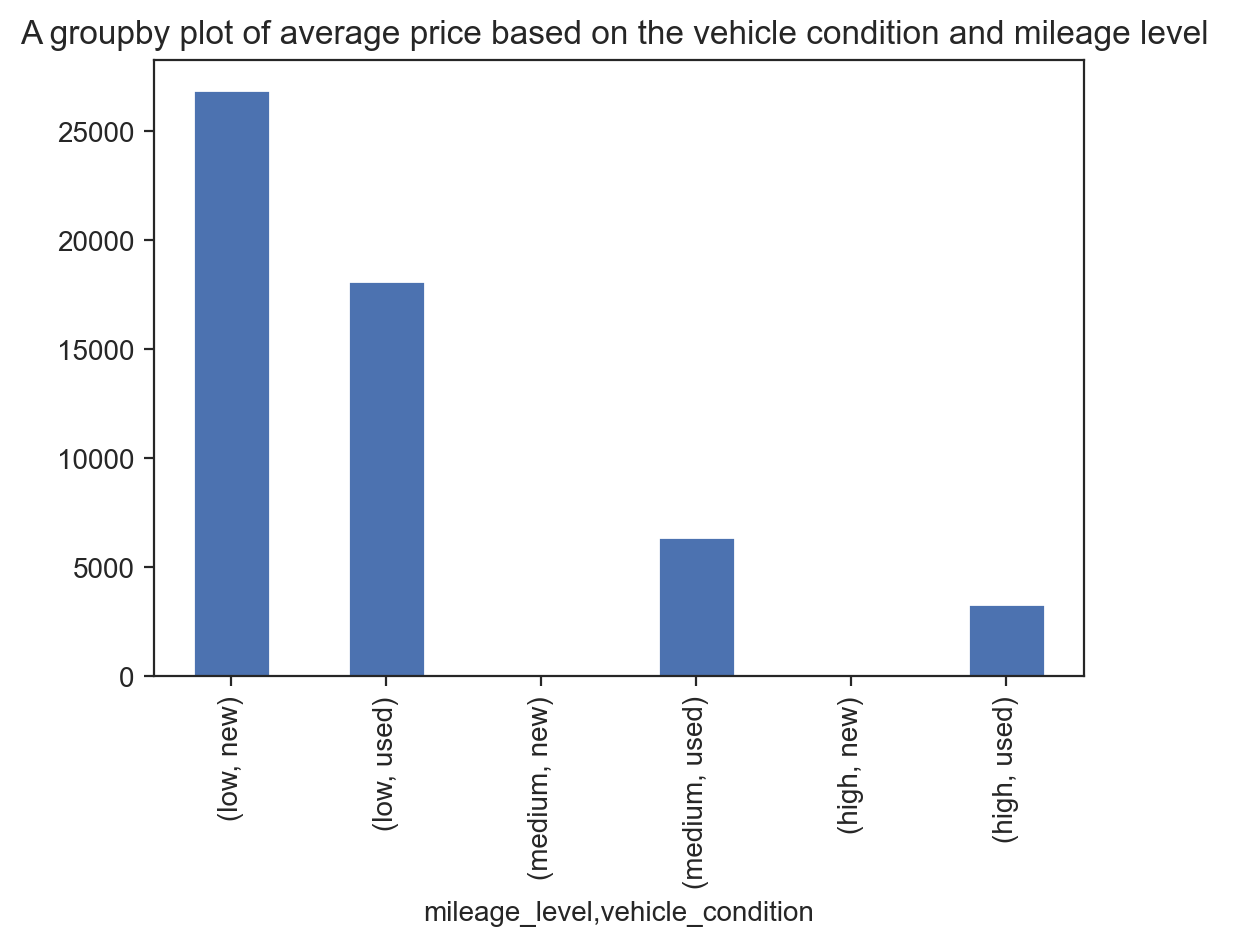

In [98]:
(car_df_petrol
 .groupby(['mileage_level', 'vehicle_condition'])
 ['price']
 .mean()
 .plot.bar()
);
plt.title("A groupby plot of average price based on the vehicle condition and mileage level ");

In [99]:
### Row Sampling and feature selection

In [100]:
sample_cardf = car_df.groupby(['standard_make','standard_model']).sample(frac=0.10, random_state=0)

# sample_cardf.query('standard_make == "jensen"')
# sample_cardf['standard_make'].value_counts()
#In this process of stratifying, it was deduced that some unique standard make is 1,
#therefore, they will be removed if a 0.01 sampling is done on them e.g jensen

In [101]:
sample_cardf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 39066 entries, 170662 to 327696
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   public_reference       39066 non-null  int64   
 1   mileage                39066 non-null  float64 
 2   reg_code               39066 non-null  Int64   
 3   standard_colour        39066 non-null  object  
 4   standard_make          39066 non-null  object  
 5   standard_model         39066 non-null  object  
 6   vehicle_condition      39066 non-null  object  
 7   year_of_registration   39066 non-null  float64 
 8   price                  39066 non-null  int64   
 9   body_type              39066 non-null  object  
 10  crossover_car_and_van  39066 non-null  bool    
 11  fuel_type              39066 non-null  object  
 12  mileage_level          39066 non-null  category
 13  vehicle_age            39066 non-null  float64 
 14  mileage_per_year       37504 non

<Axes: >

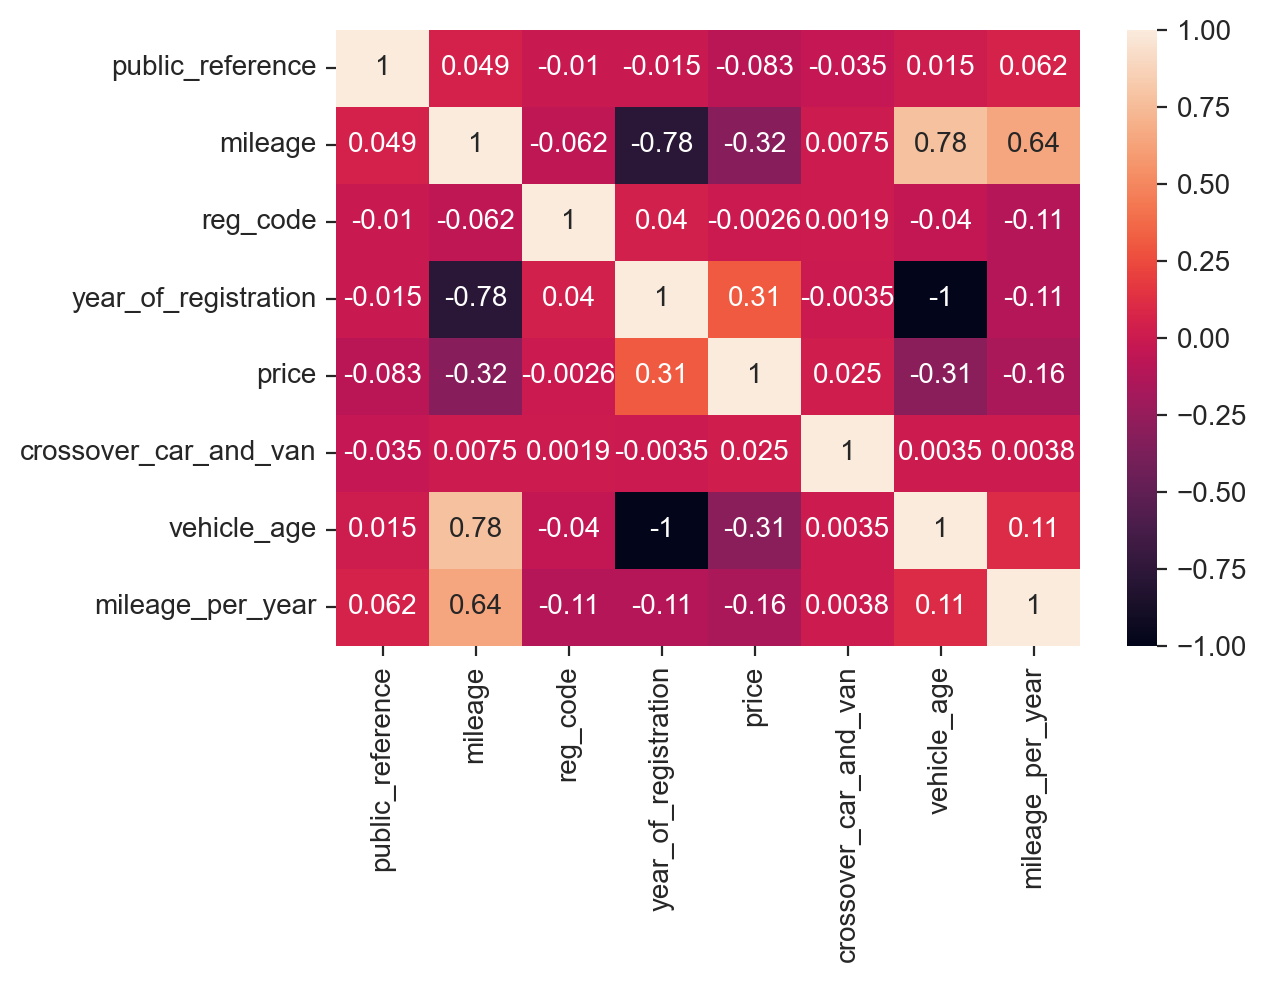

In [102]:
sns.heatmap(sample_cardf.corr(), annot=True)

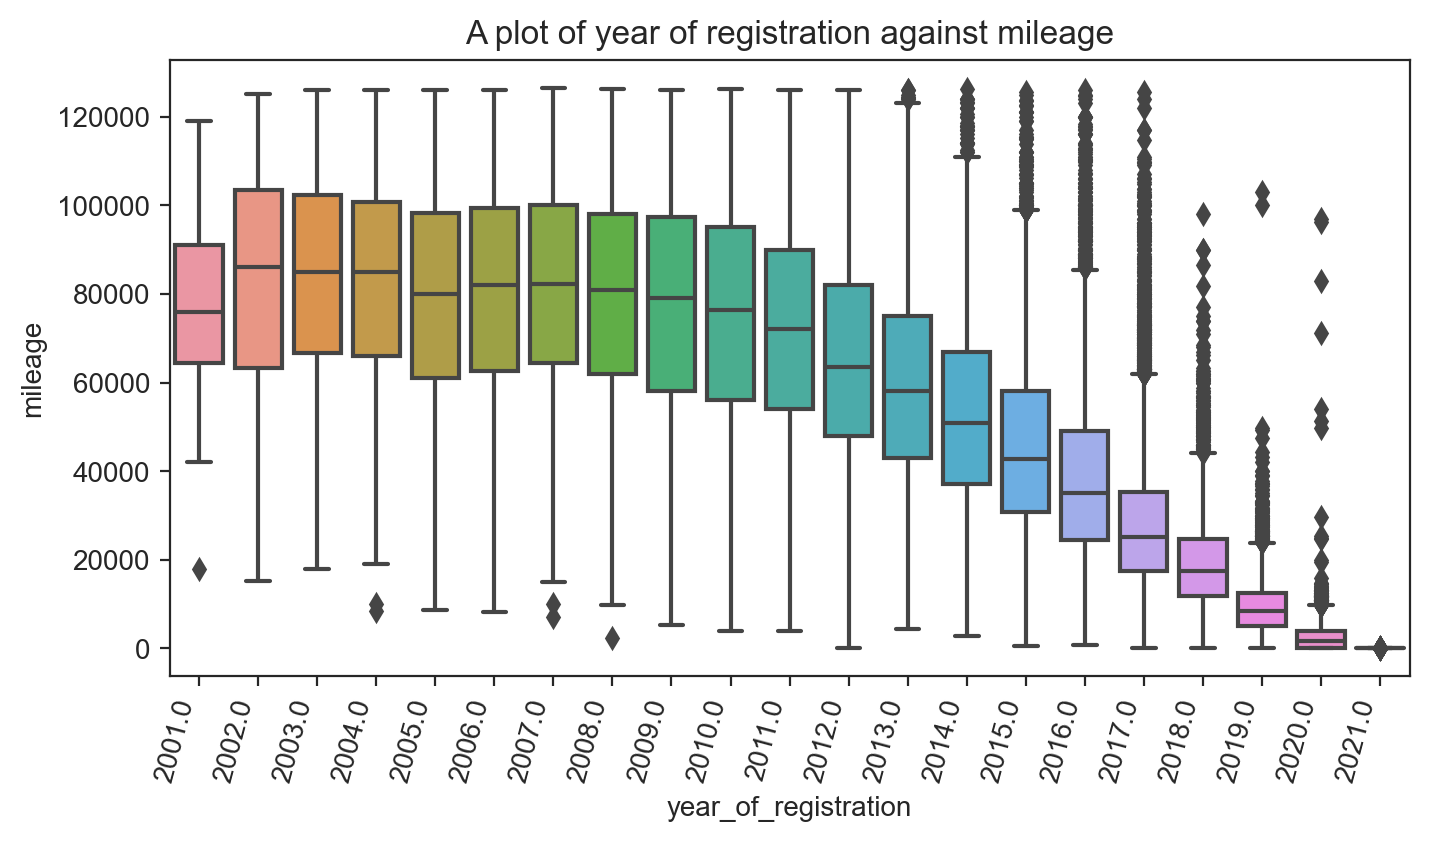

In [103]:
plt.subplots(figsize=(8,4))

ax = sns.boxplot(data=sample_cardf, x='year_of_registration', y='mileage')
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha="right")
plt.title('A plot of year of registration against mileage')
plt.show()

# This is a subset of the original data grouped by the standard make and standard
# model, this shows that cars with lower mileage are sold as the year increases

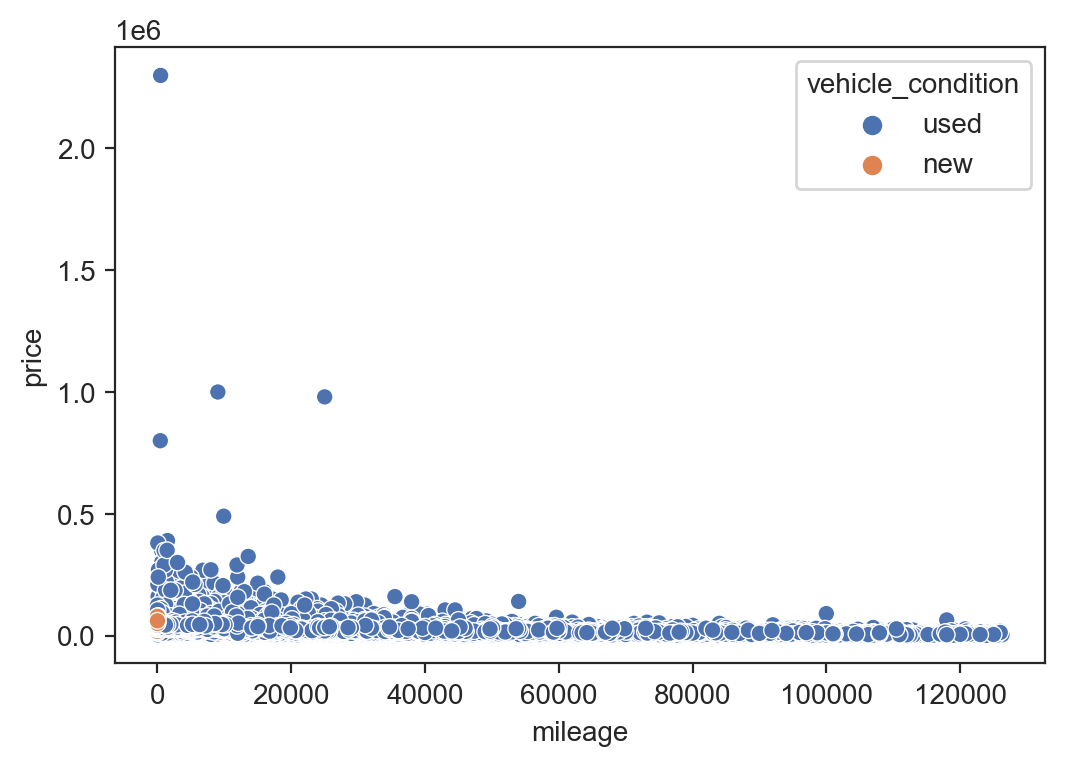

In [104]:
sns.scatterplot(data=sample_cardf, 
                x='mileage', 
                y='price', 
                hue='vehicle_condition');



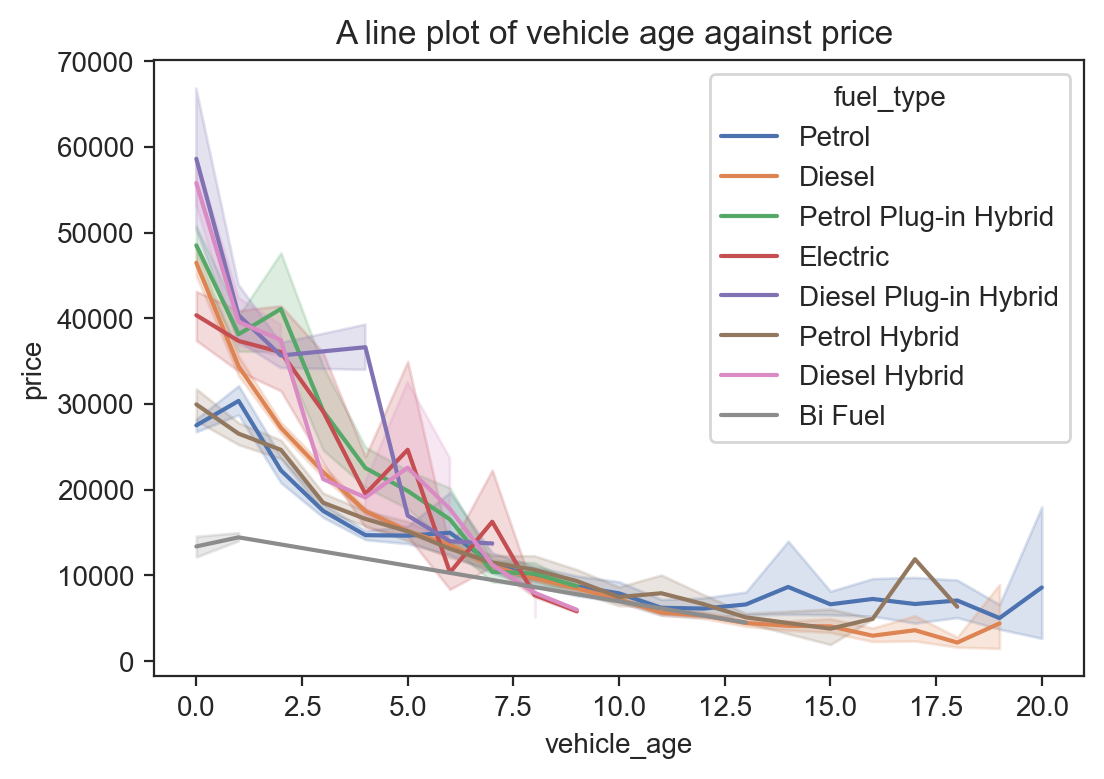

In [105]:
sns.lineplot(data=sample_cardf, 
             x='vehicle_age', y='price', 
             hue='fuel_type', legend='auto');
plt.title('A line plot of vehicle age against price ');
plt.show();


In [106]:
sample_cardf.query('year_of_registration == 2013').max()

# #this is the vehicle that caused an hike in average price, therefore,
# this should be an outlier, the price is 1350000, too high

public_reference               202011015683313
mileage                               126000.0
reg_code                                    63
standard_colour                         yellow
standard_make                            volvo
standard_model                   zafira tourer
vehicle_condition                         used
year_of_registration                    2013.0
price                                   239989
body_type                                  suv
crossover_car_and_van                     True
fuel_type                Petrol Plug-in Hybrid
mileage_level                             high
vehicle_age                                8.0
mileage_per_year                       15750.0
dtype: object

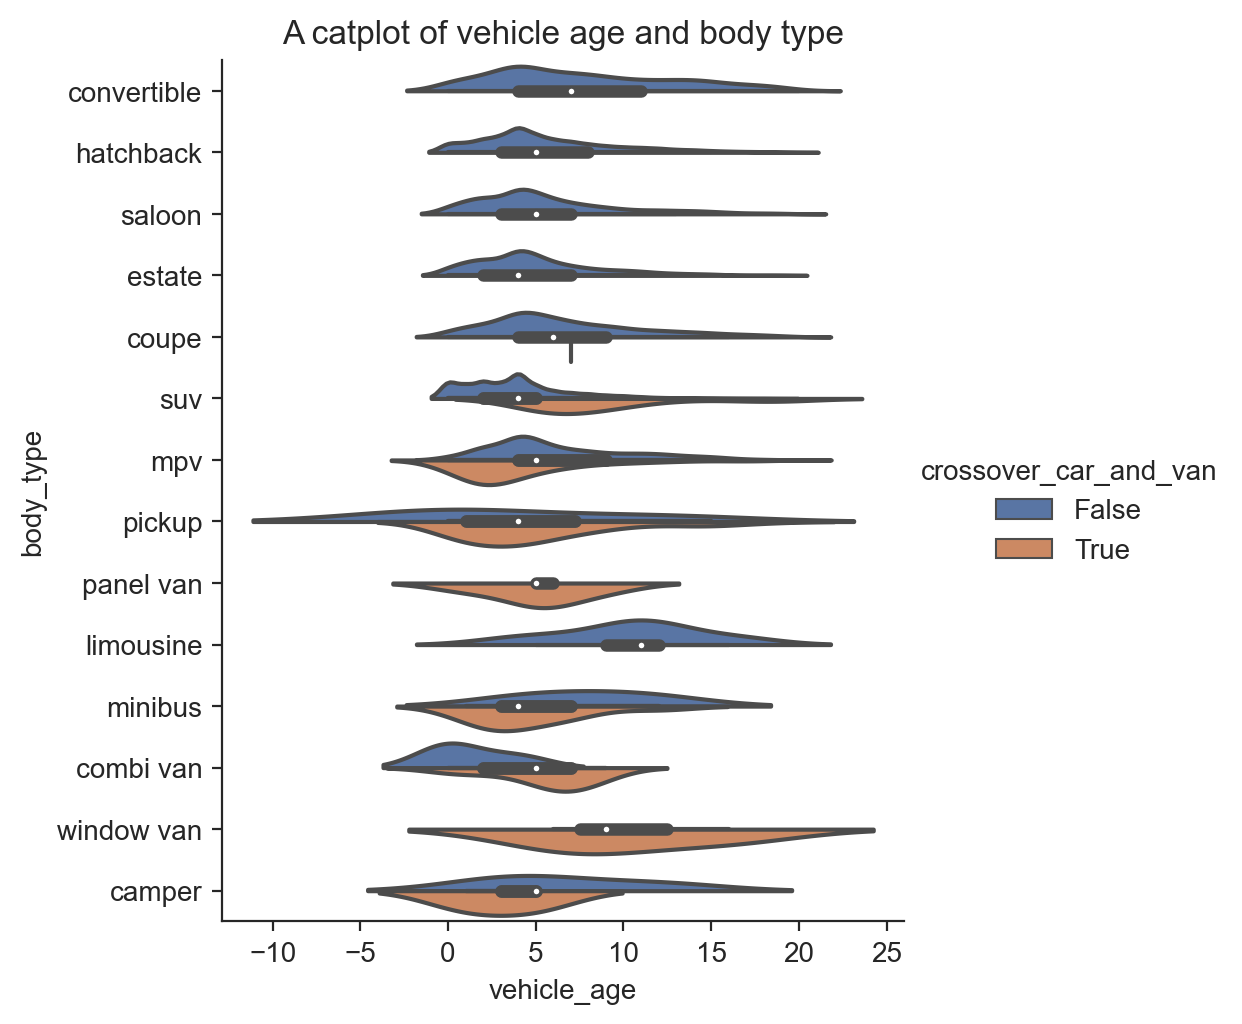

In [107]:

sns.catplot(
    data=sample_cardf, x="vehicle_age", y="body_type", 
    hue="crossover_car_and_van",
    kind="violin", split=True,
);
plt.title('A catplot of vehicle age and body type');

# There are 8 body types that has van, while the other 6 are crossover
# Limousine median age is higher compare to other body_type, with a median age of 11years

In [108]:
sample_cardf['standard_make'].value_counts()

bmw                           3594
audi                          3421
vauxhall                      3314
volkswagen                    3313
mercedes-benz                 3076
                              ... 
bugatti                          1
levc                             1
great wall                       1
hummer                           1
london taxis international       1
Name: standard_make, Length: 63, dtype: int64

In [109]:
BMW_cars = sample_cardf[sample_cardf['standard_make'] == 'bmw']

# BMW has the highest car in record

In [110]:
BMW_cars.head()

public_reference   mileage  reg_code standard_colour standard_make  \
43428    202010084765255   31959.0        17           black           bmw   
80711    202010245375473   35748.0        67            blue           bmw   
11576    202010074691388   34956.0        66             red           bmw   
259980   202010094817330  100358.0        66          silver           bmw   
170132   202010225319770   73817.0        16           white           bmw   

       standard_model vehicle_condition  year_of_registration  price  \
43428        1 series              used                2017.0  13950   
80711        1 series              used                2017.0  15300   
11576        1 series              used                2016.0  12799   
259980       1 series              used                2016.0   7800   
170132       1 series              used                2016.0   8795   

        body_type  crossover_car_and_van fuel_type mileage_level  vehicle_age  \
43428   hatchback                  False    Petrol           low          4.0   
80711   hatchback                  False    Diesel           low          4.0   
11576   hatchback                  False    Diesel           low          5.0   
259980  hatchback                  False    Diesel          high          5.0   
170132  hatchback                  False    Diesel        medium          5.0   

        mileage_per_year  
43428             7990.0  
80711             8937.0  
11576             6991.0  
259980           20072.0  
170132           14763.0

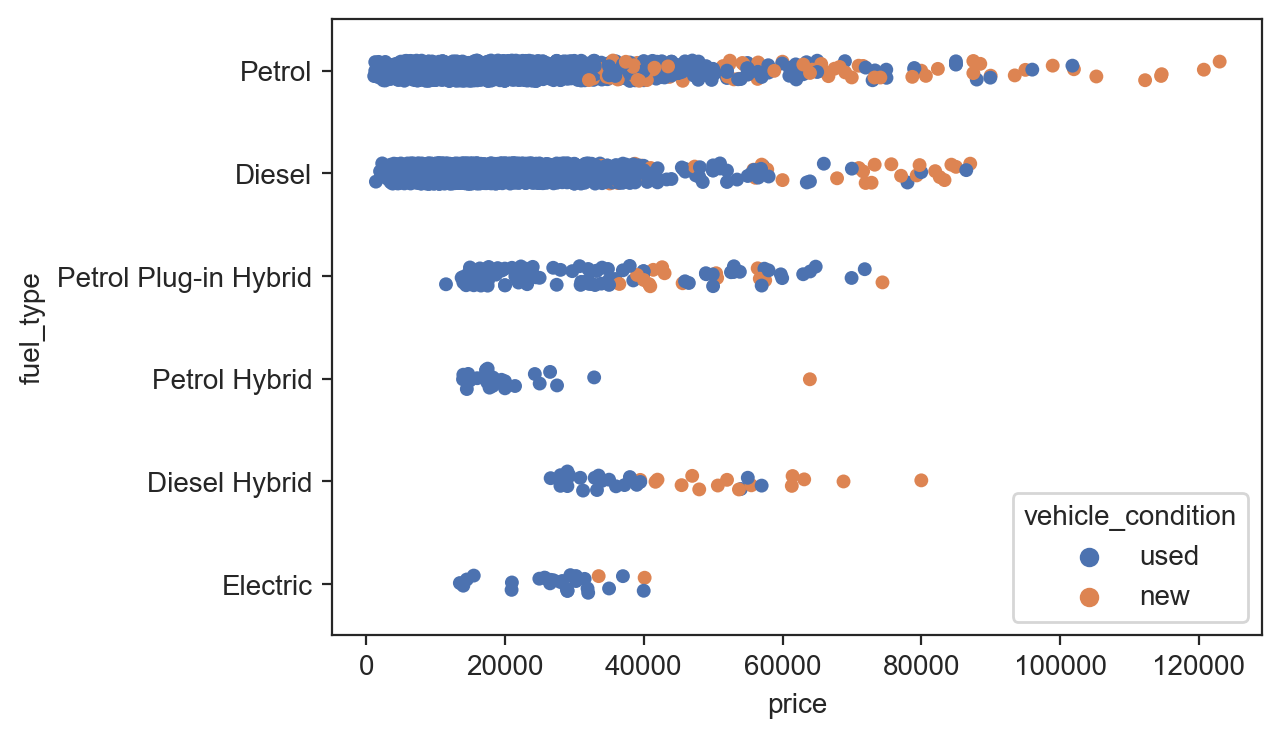

In [111]:


sns.stripplot(data=BMW_cars, 
              x="price", 
              y="fuel_type", 
              hue="vehicle_condition"
             );

# This analyses the price of BMW cars based on the fuel type and vehicle condition, petrol car and diesel cars are cheaper,
# Diesel hybrid BMW which are used are more expensive compare to other used vehicles


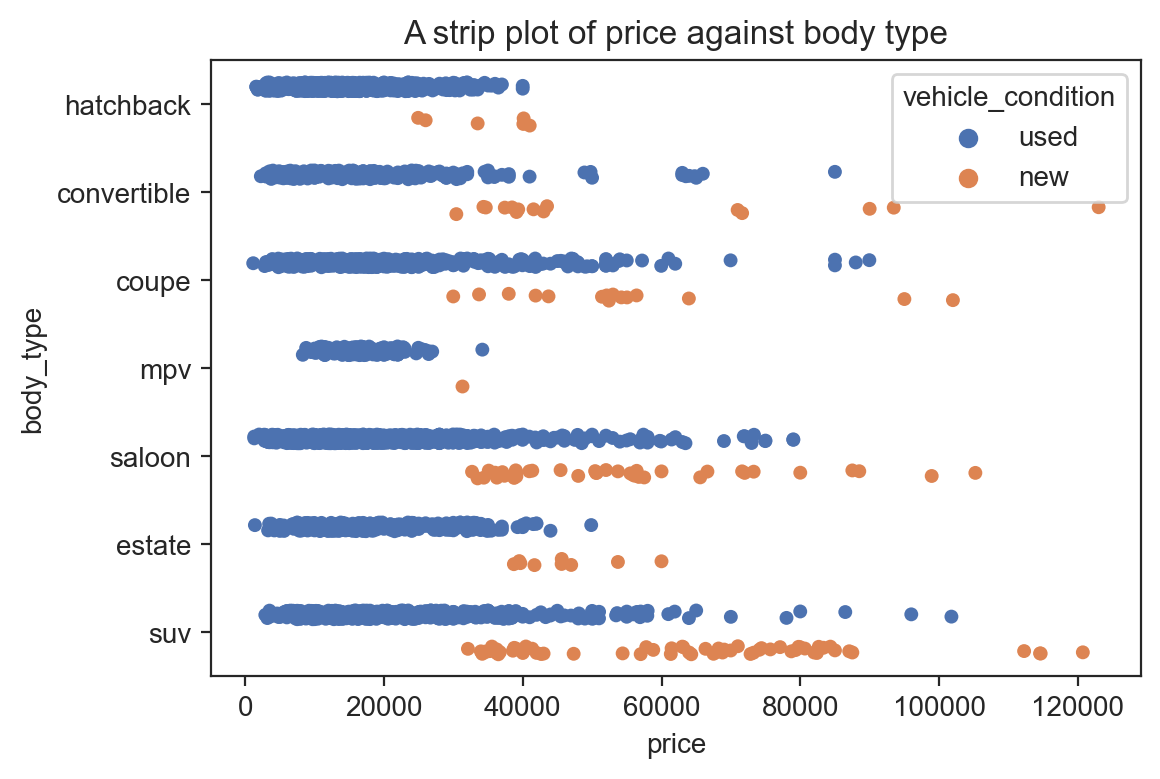

In [112]:

sns.stripplot(data=BMW_cars, 
              x="price", 
              y="body_type", 
              hue="vehicle_condition",
              dodge=True
             );
plt.title('A strip plot of price against body type');
# New convertibles has the highest price compare to other new vehicles

In [113]:
top_10 = sample_cardf['standard_make'].value_counts().head(5).index
top_makes_10 = sample_cardf[sample_cardf['standard_make'].isin(top_10)]
top_makes_10

public_reference  mileage  reg_code standard_colour standard_make  \
285844   202010074726750  15979.0        66            grey          audi   
367965   202010114865953  10550.0        19            grey          audi   
36997    202009083453817   2179.0        20            grey          audi   
226230   202008252912426  96000.0        12             red          audi   
7567     202010054603106  13890.0        16           black          audi   
...                  ...      ...       ...             ...           ...   
201805   202008303097685      0.0        21           white    volkswagen   
347901   202010255405361  48999.0        15           black    volkswagen   
222969   202009183911260  20000.0        13             red    volkswagen   
124942   202010034561845  24000.0        67           white    volkswagen   
74232    202010155019957  27705.0        66             red    volkswagen   

       standard_model vehicle_condition  year_of_registration  price  \
285844             a1              used                2016.0  11875   
367965             a1              used                2019.0  20995   
36997              a1              used                2020.0  28000   
226230             a1              used                2012.0   5495   
7567               a1              used                2016.0  14000   
...               ...               ...                   ...    ...   
201805            up!               new                2021.0  16803   
347901            up!              used                2015.0   5750   
222969            up!              used                2013.0   6495   
124942            up!              used                2018.0  11200   
74232             up!              used                2016.0   7995   

        body_type  crossover_car_and_van fuel_type mileage_level  vehicle_age  \
285844  hatchback                  False    Petrol           low          5.0   
367965  hatchback                  False    Petrol           low          2.0   
36997   hatchback                  False    Petrol           low          1.0   
226230  hatchback                  False    Diesel        medium          9.0   
7567    hatchback                  False    Petrol           low          5.0   
...           ...                    ...       ...           ...          ...   
201805  hatchback                  False    Petrol           low          0.0   
347901  hatchback                  False    Petrol           low          6.0   
222969  hatchback                  False    Petrol           low          8.0   
124942  hatchback                  False    Petrol           low          3.0   
74232   hatchback                  False    Petrol           low          5.0   

        mileage_per_year  
285844            3196.0  
367965            5275.0  
36997             2179.0  
226230           10667.0  
7567              2778.0  
...                  ...  
201805               NaN  
347901            8166.0  
222969            2500.0  
124942            8000.0  
74232             5541.0  

[16718 rows x 15 columns]

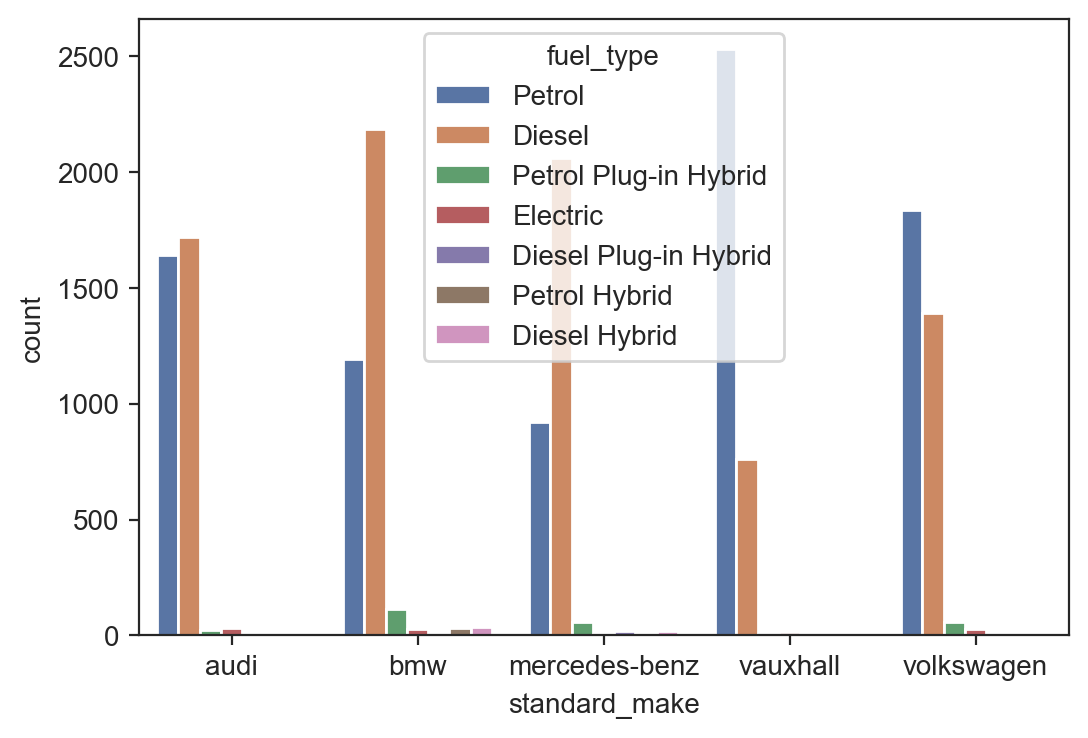

In [114]:
sns.countplot(
    data=top_makes_10, 
    x="standard_make", 
    hue="fuel_type"
)
plt.show()

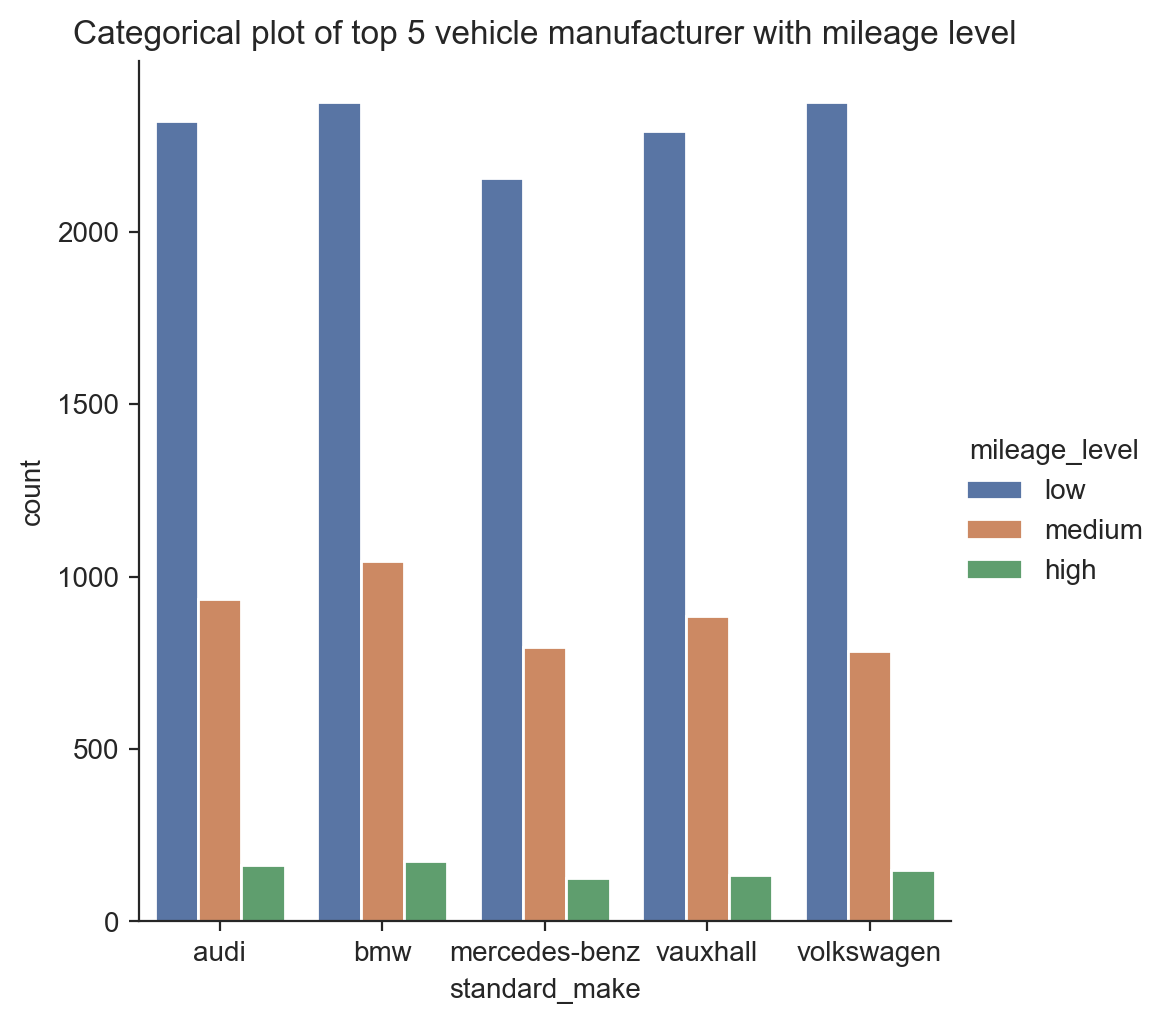

In [115]:
sns.catplot(
    data=top_makes_10, 
    x="standard_make", 
    hue="mileage_level",
    kind='count'
)
plt.title('Categorical plot of top 5 vehicle manufacturer with mileage level')
plt.show()


# more cars with low mileage level were sold for the top 5 most sold car standard make

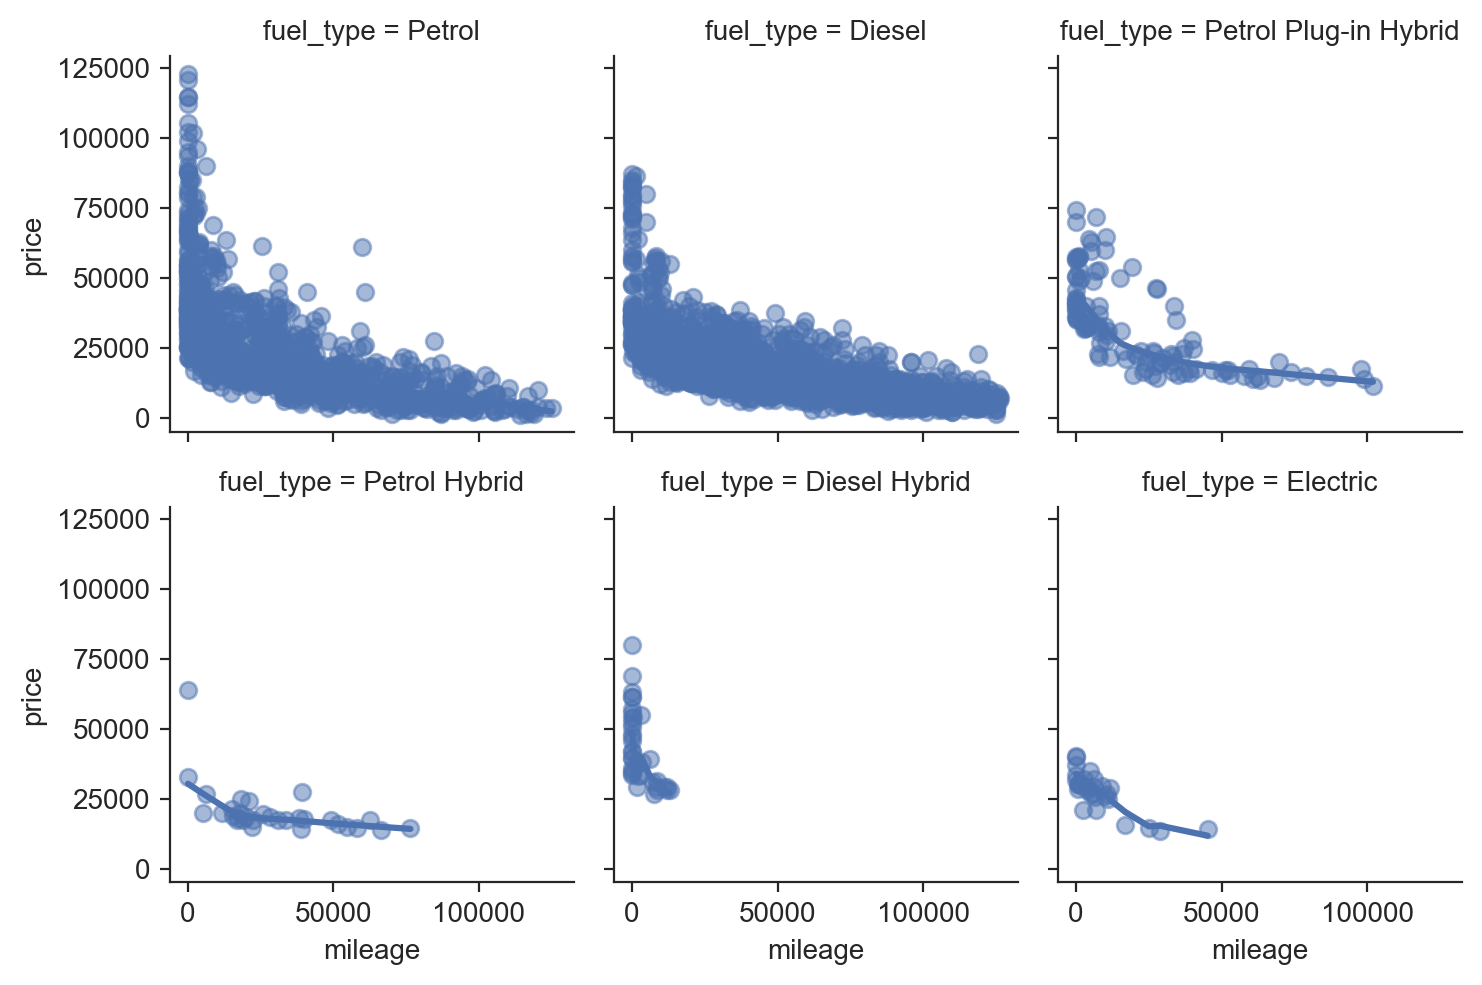

In [116]:
sns.lmplot(
    data=BMW_cars, x='mileage', y='price', col='fuel_type', col_wrap=3,
    scatter_kws=dict(alpha=0.5), height=2.5, lowess=True
);

In [117]:
crossover_car = sample_cardf[sample_cardf['crossover_car_and_van']==True]
crossover_car

public_reference   mileage  reg_code standard_colour standard_make  \
19814    202009163783006  111000.0        15           black       citroen   
266266   202010144971230   17831.0        68            grey       citroen   
101195   202009173863011       0.0        21          orange       citroen   
339216   202008293066424   16575.0        19          silver       citroen   
397790   202009214024710   25950.0        18            grey          fiat   
...                  ...       ...       ...             ...           ...   
292176   202009284289838   77000.0         9           black    volkswagen   
394443   202009244129774   23365.0        68           green    volkswagen   
13610    202010144971218   32245.0        68           green    volkswagen   
9068     202008212757933   69449.0        14           white    volkswagen   
28530    202010165061325   53050.0        14           black    volkswagen   

               standard_model vehicle_condition  year_of_registration  price  \
19814                dispatch              used                2015.0   8999   
266266            spacetourer              used                2018.0  23500   
101195            spacetourer               new                2021.0  32847   
339216            spacetourer              used                2019.0  19490   
397790               fullback              used                2018.0  16800   
...                       ...               ...                   ...    ...   
292176    transporter shuttle              used                2009.0  23000   
394443    transporter shuttle              used                2019.0  22100   
13610     transporter shuttle              used                2018.0  21400   
9068      transporter shuttle              used                2014.0  16995   
28530   transporter sportline              used                2014.0  23250   

        body_type  crossover_car_and_van fuel_type mileage_level  vehicle_age  \
19814         mpv                   True    Diesel          high          6.0   
266266        mpv                   True    Diesel           low          3.0   
101195        mpv                   True    Diesel           low          0.0   
339216        mpv                   True    Diesel           low          2.0   
397790     pickup                   True    Diesel           low          3.0   
...           ...                    ...       ...           ...          ...   
292176    minibus                   True    Diesel        medium         12.0   
394443    minibus                   True    Diesel           low          2.0   
13610     minibus                   True    Diesel           low          3.0   
9068      minibus                   True    Diesel        medium          7.0   
28530   combi van                   True    Diesel        medium          7.0   

        mileage_per_year  
19814            18500.0  
266266            5944.0  
101195               NaN  
339216            8288.0  
397790            8650.0  
...                  ...  
292176            6417.0  
394443           11682.0  
13610            10748.0  
9068              9921.0  
28530             7579.0  

[155 rows x 15 columns]

In [118]:
benz = sample_cardf[sample_cardf['standard_make'] == 'mercedes-benz']


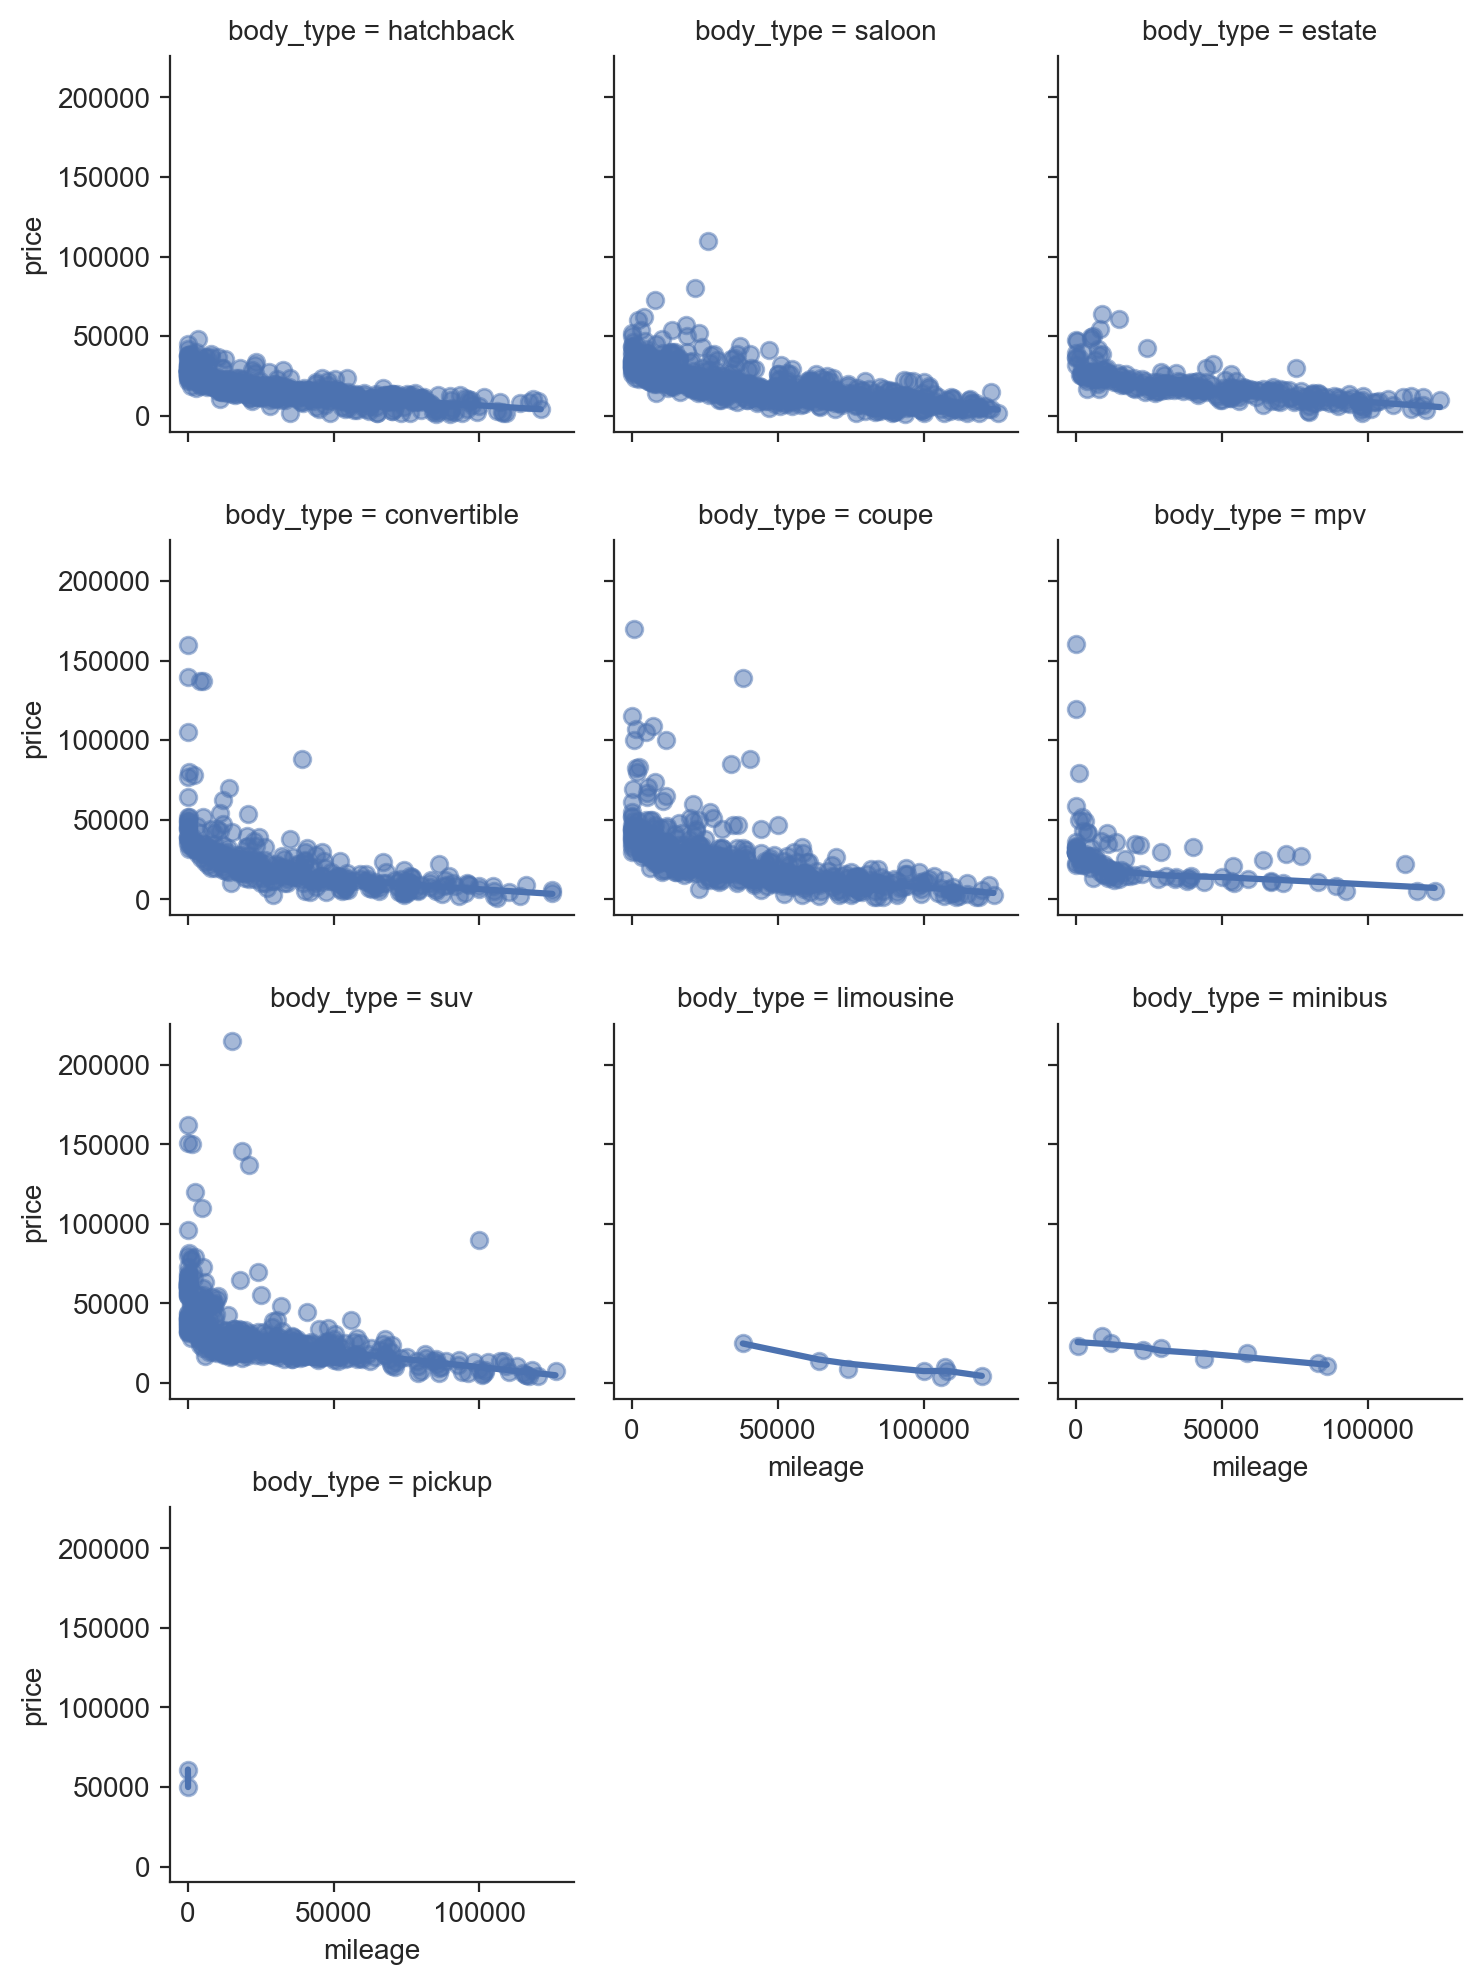

In [119]:
sns.lmplot(
    data=benz, x='mileage', y='price', col='body_type', col_wrap=3,
    scatter_kws=dict(alpha=0.5), height=2.5, lowess=True
);

In [120]:
fer = sample_cardf[sample_cardf['standard_make'] == 'ferrari']

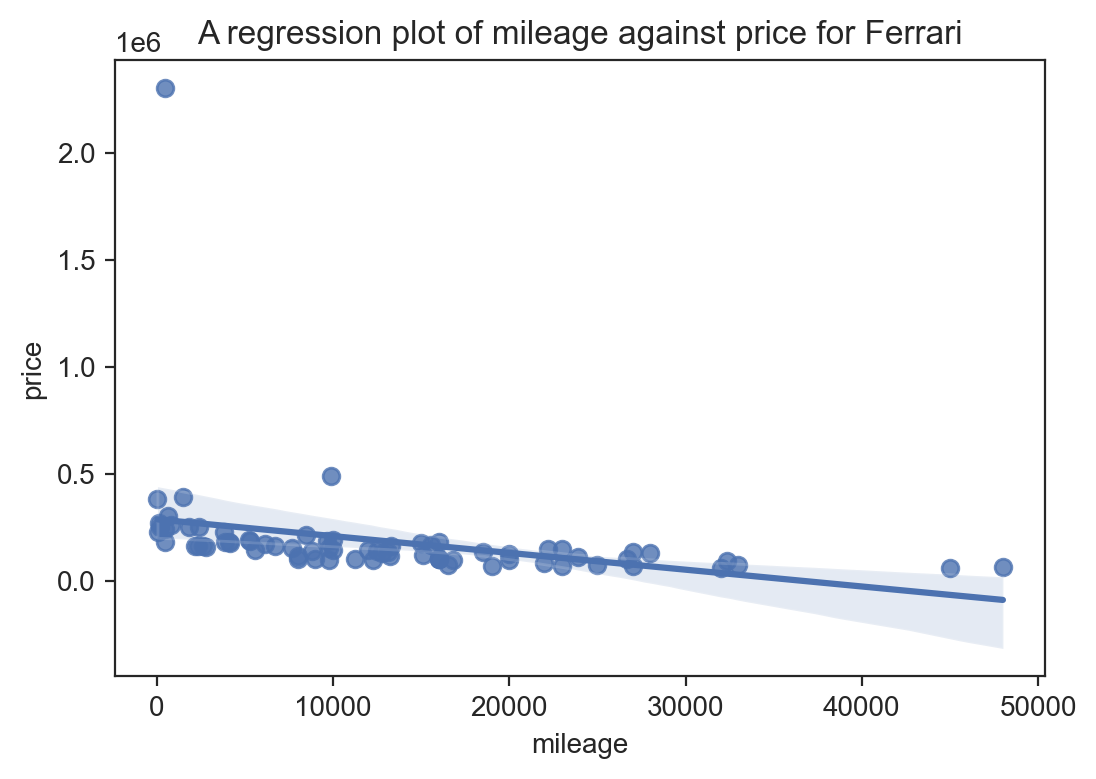

In [121]:
sns.regplot(data=fer, y="price", x="mileage");
plt.title("A regression plot of mileage against price for Ferrari");
#Here, it seeems the mileage doesn't affect the price significantly

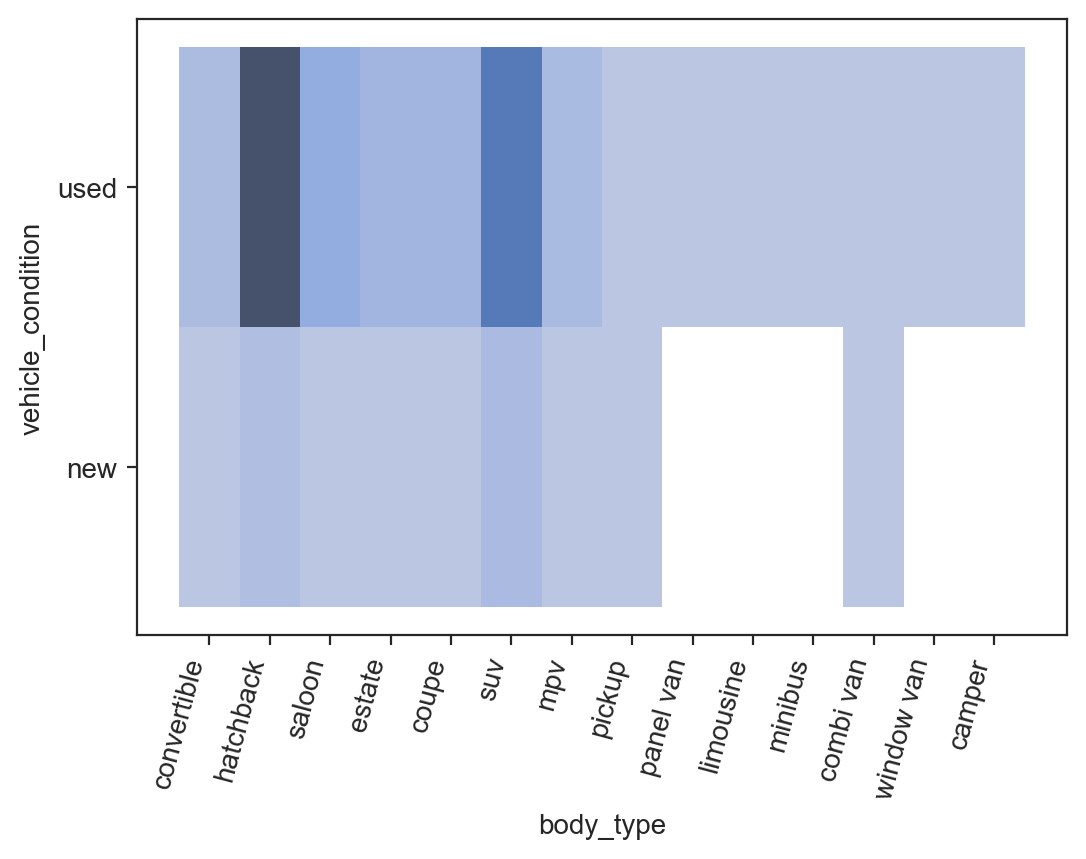

In [122]:
ax = sns.histplot(data=sample_cardf, x='body_type', y='vehicle_condition');
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha="right");
